In [24]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [25]:
df=pd.read_csv('file:///C:/Users/SR%20COMPUTER/Downloads/seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [26]:
df.shape

(1461, 6)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [28]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [29]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,4.0,0.256702,0.548194,-0.228555,-0.111652,0.127681,0.496034,1.0
temp_max,4.0,0.370569,0.657510,-0.228555,-0.180781,0.355415,0.906765,1.0
temp_min,4.0,0.432204,0.586063,-0.074185,-0.073059,0.401501,0.906765,1.0
wind,4.0,0.272251,0.530350,-0.164857,-0.096853,0.126930,0.496034,1.0


<AxesSubplot:>

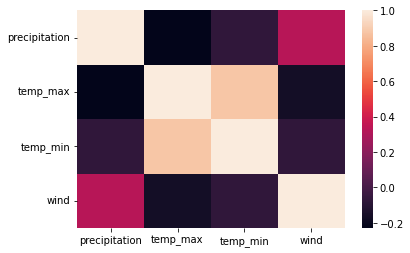

In [30]:
sns.heatmap(df.corr())

In [31]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [32]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [33]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "date" is
 2012-01-01    1
2014-09-09    1
2014-09-07    1
2014-09-06    1
2014-09-05    1
             ..
2013-04-30    1
2013-04-29    1
2013-04-28    1
2013-04-27    1
2015-12-31    1
Name: date, Length: 1461, dtype: int64
-------------------------------------------------
unique values in column "precipitation" is
 0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
30.0      1
26.4      1
19.1      1
46.7      1
21.8      1
Name: precipitation, Length: 111, dtype: int64
-------------------------------------------------
unique values in column "temp_max" is
  11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: temp_max, Length: 67, dtype: int64
-------------------------------------------------
unique values in column "temp_min" is
  6.1     66
 10.0    64
 11.7    60
 7.2     60
 13.3    58
 11.1    56
 4.4     55
 13.9    54
 9.4     53
 8.3     52
 15.0 

In [34]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [35]:
object_col

['date', 'weather']

In [36]:
num_col

['precipitation', 'temp_max', 'temp_min', 'wind']

In [37]:
df['date'].value_counts()

2012-01-01    1
2014-09-09    1
2014-09-07    1
2014-09-06    1
2014-09-05    1
             ..
2013-04-30    1
2013-04-29    1
2013-04-28    1
2013-04-27    1
2015-12-31    1
Name: date, Length: 1461, dtype: int64

In [38]:
##Fetaure Engineering Process
df['Year']=df['date'].str.split('-').str[0]
df['Month']=df['date'].str.split('-').str[1]
df['Day']=df['date'].str.split('-').str[2]

In [39]:
df.head(3)

,date,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,01,01
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,01,02
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,01,03


In [40]:
df.drop(['date'],axis='columns',inplace=True)

In [41]:
df.head(3)

,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day
0,0.0,12.8,5.0,4.7,drizzle,2012,01,01
1,10.9,10.6,2.8,4.5,rain,2012,01,02
2,0.8,11.7,7.2,2.3,rain,2012,01,03


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
 5   Year           1461 non-null   int32  
 6   Month          1461 non-null   int32  
 7   Day            1461 non-null   int32  
dtypes: float64(4), int32(3), object(1)
memory usage: 74.3+ KB


In [43]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Day']=df['Day'].astype(int)

In [45]:
df.mean()

C:\Users\SR COMPUTER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


precipitation       3.029432
temp_max           16.439083
temp_min            8.234771
wind                3.241136
Year             2013.498973
Month               6.522930
Day                15.729637
dtype: float64

In [46]:
df.max()

precipitation    55.9
temp_max         35.6
temp_min         18.3
wind              9.5
weather           sun
Year             2015
Month              12
Day                31
dtype: object

In [47]:
df.min()

precipitation        0.0
temp_max            -1.6
temp_min            -7.1
wind                 0.4
weather          drizzle
Year                2012
Month                  1
Day                    1
dtype: object

In [48]:
df.skew()

C:\Users\SR COMPUTER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


precipitation    3.505644
temp_max         0.280930
temp_min        -0.249459
wind             0.891668
Year             0.001104
Month           -0.009303
Day              0.006766
dtype: float64

In [49]:
import dtale
dtale.show(df)

<AxesSubplot:>

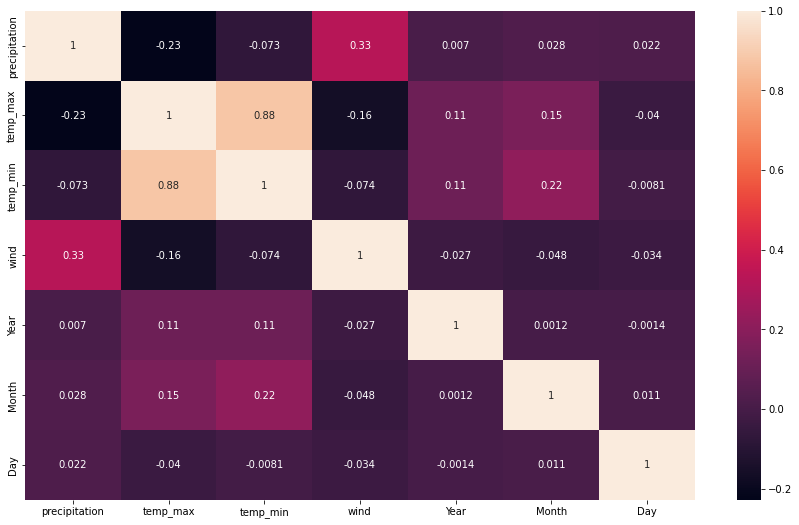

In [50]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

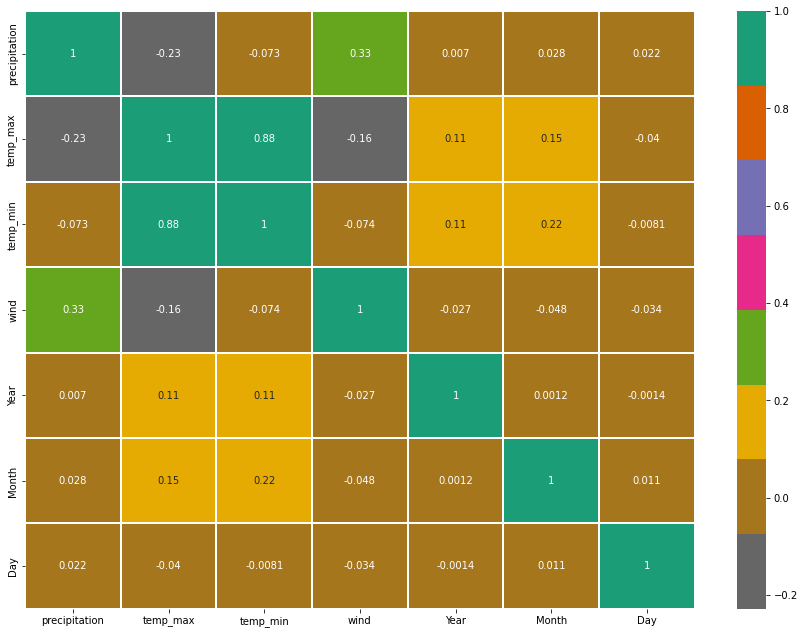

In [52]:
plt.figure(figsize=(15,11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

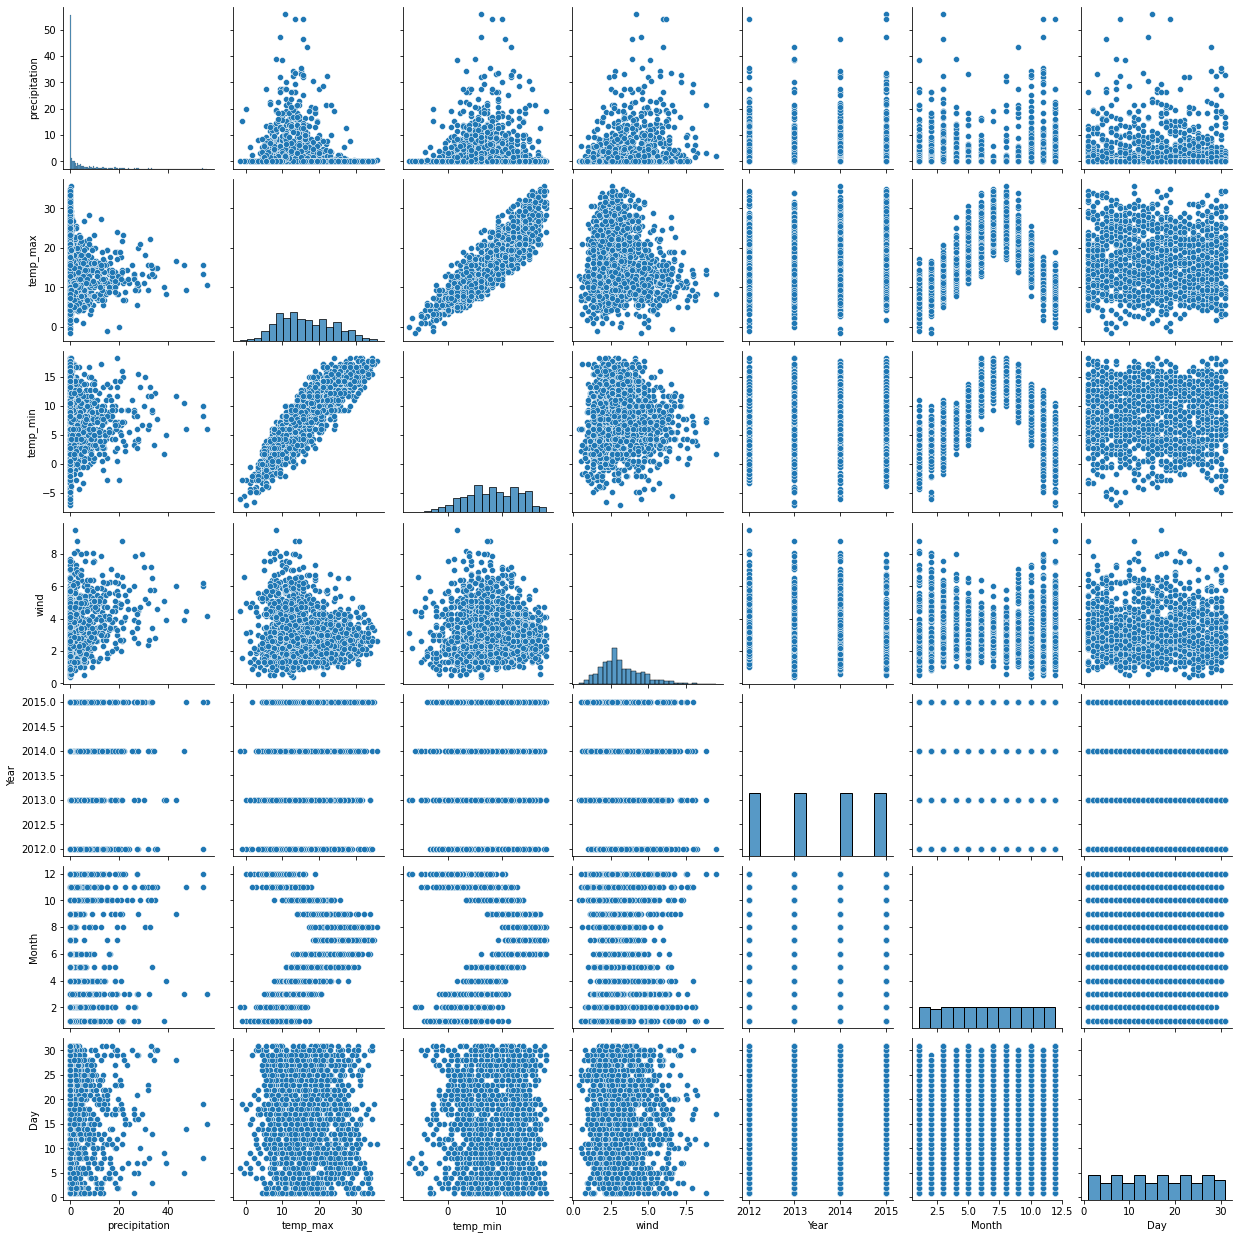

In [53]:
sns.pairplot(df)

In [54]:
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'Year',
       'Month', 'Day'],
      dtype='object')

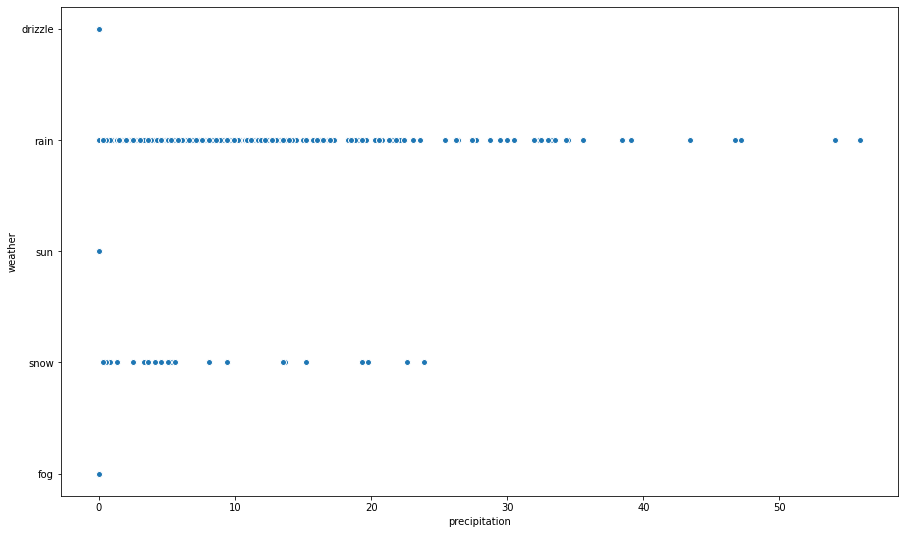

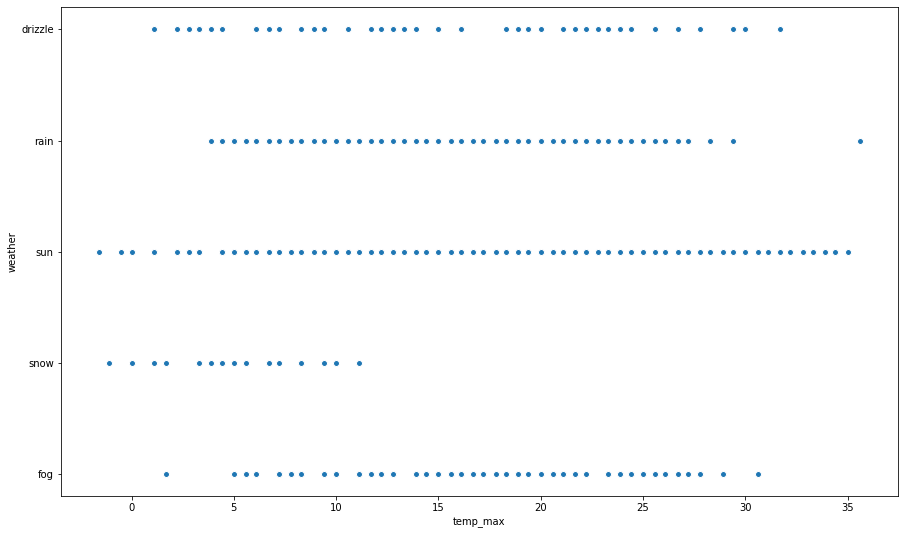

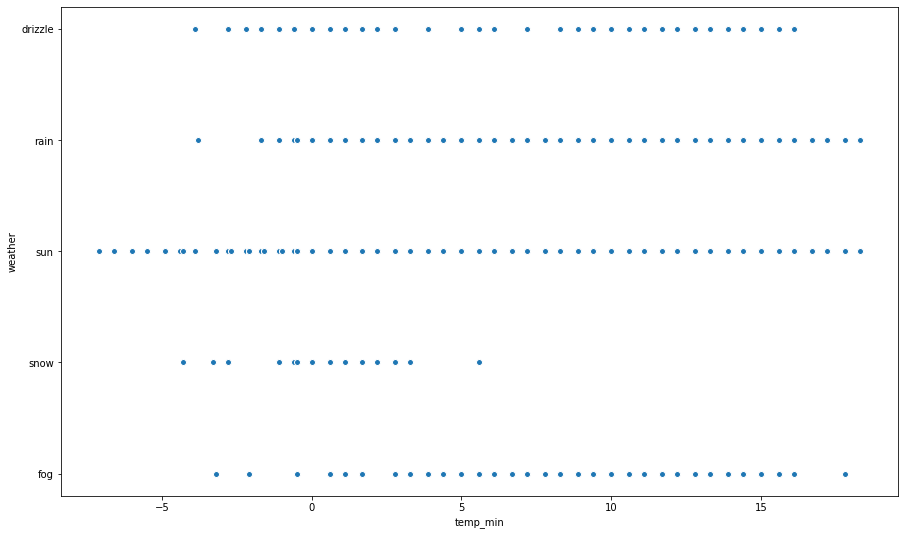

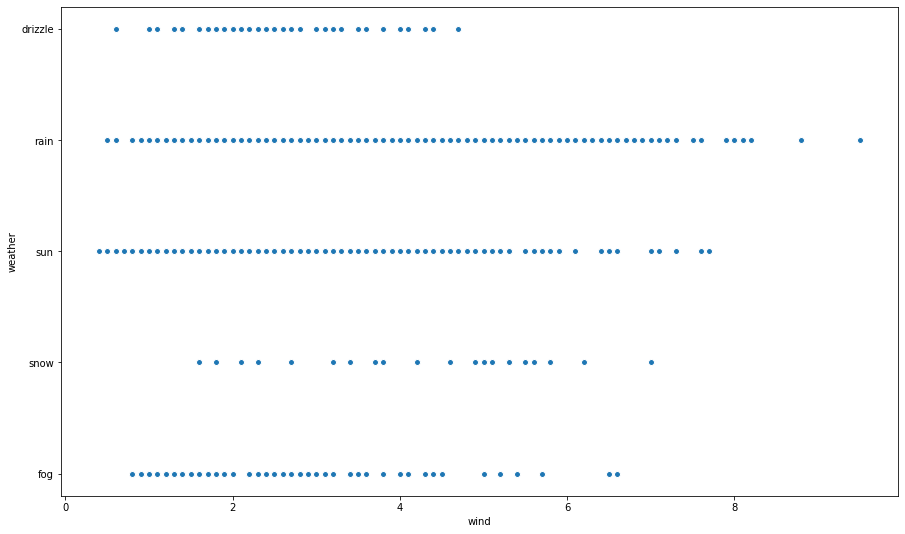

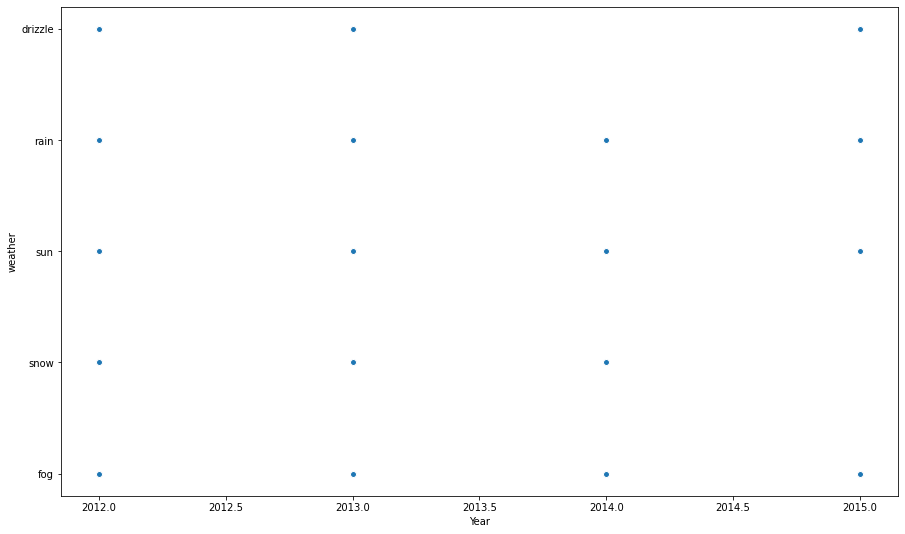

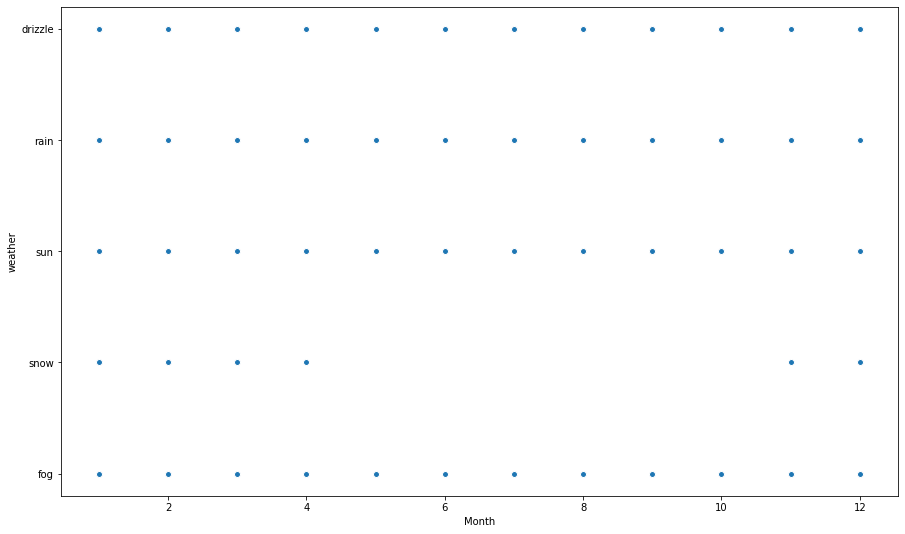

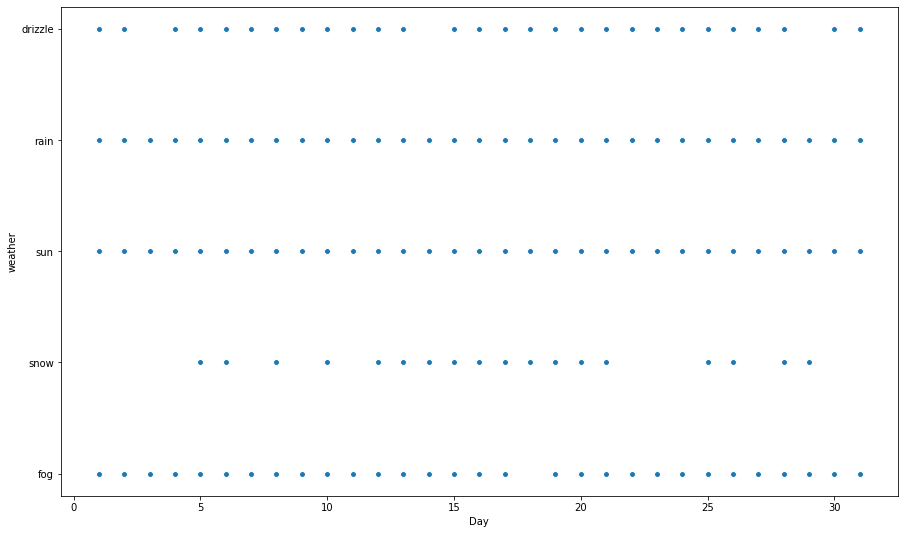

In [58]:
for i in ['precipitation', 'temp_max', 'temp_min', 'wind','Year',
       'Month', 'Day']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(y=df.weather,x=df[i],data=df,linewidth=1,)
    plt.show()

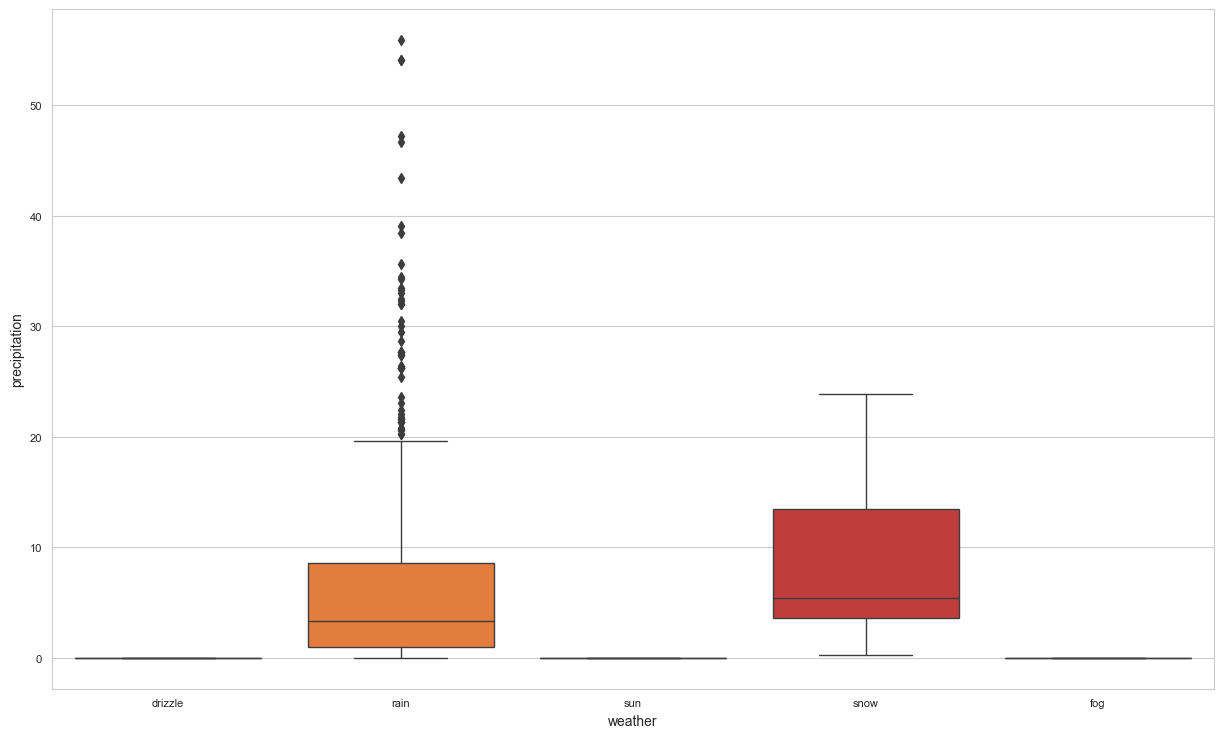

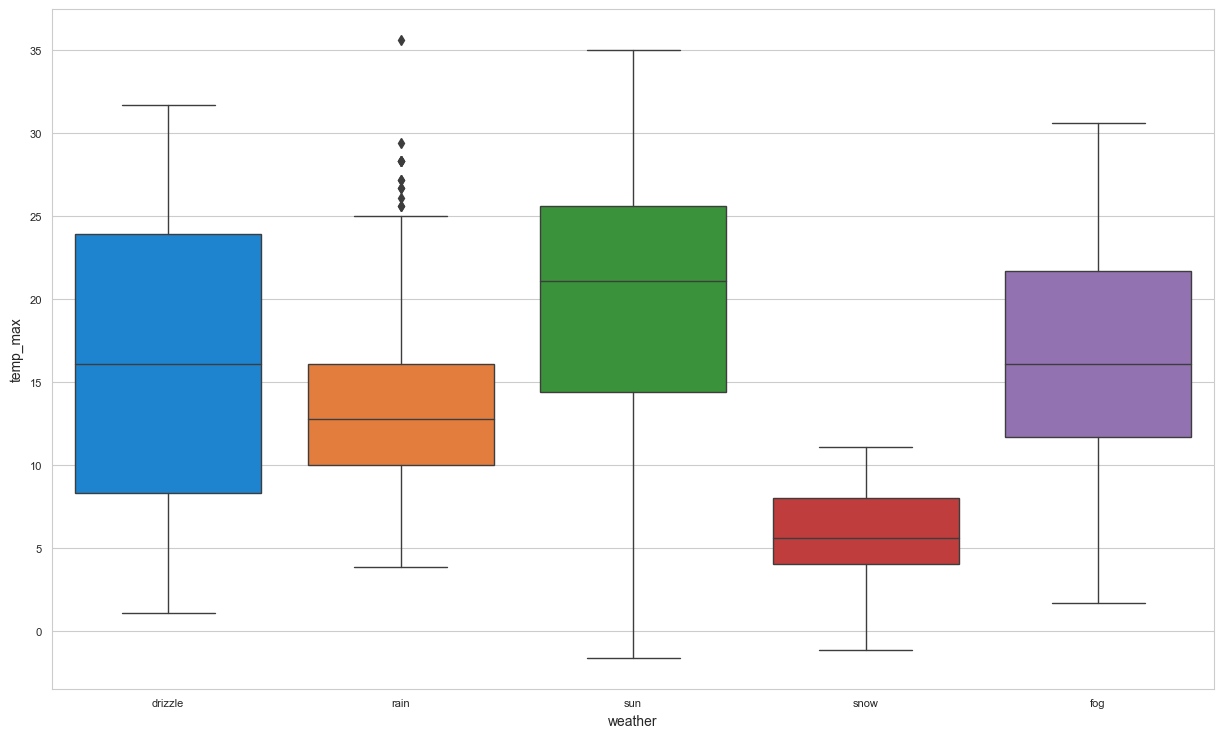

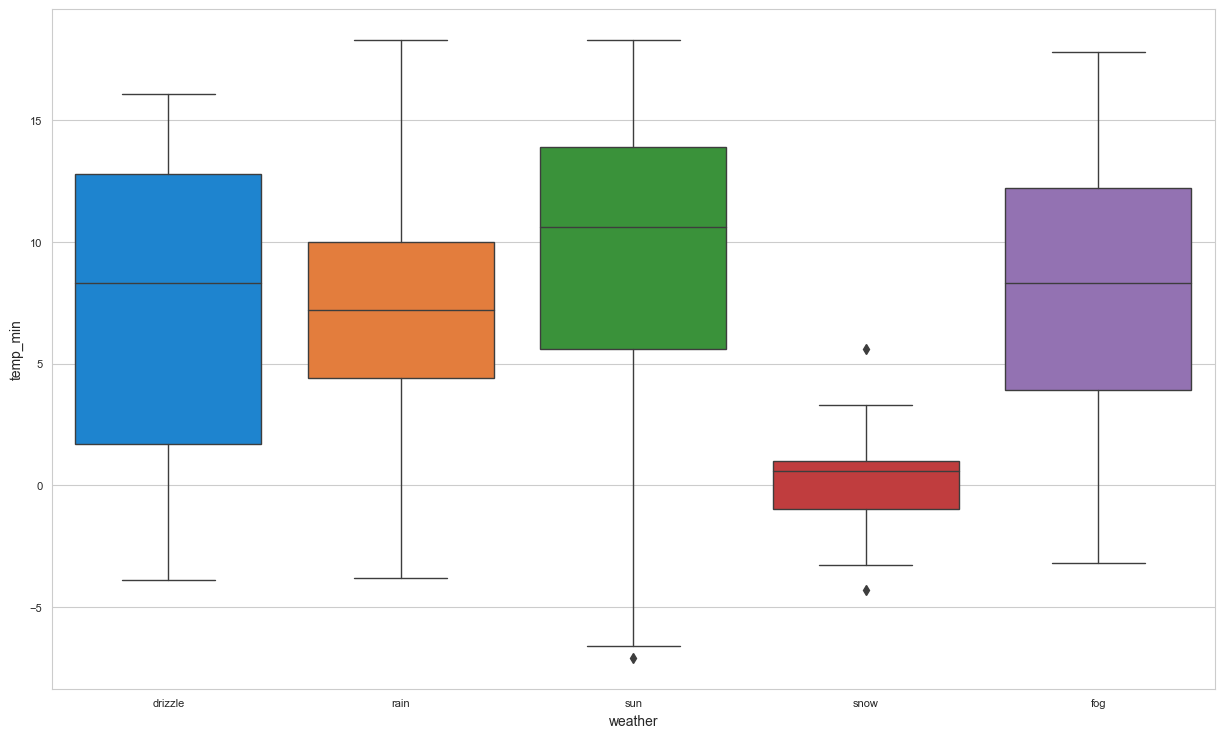

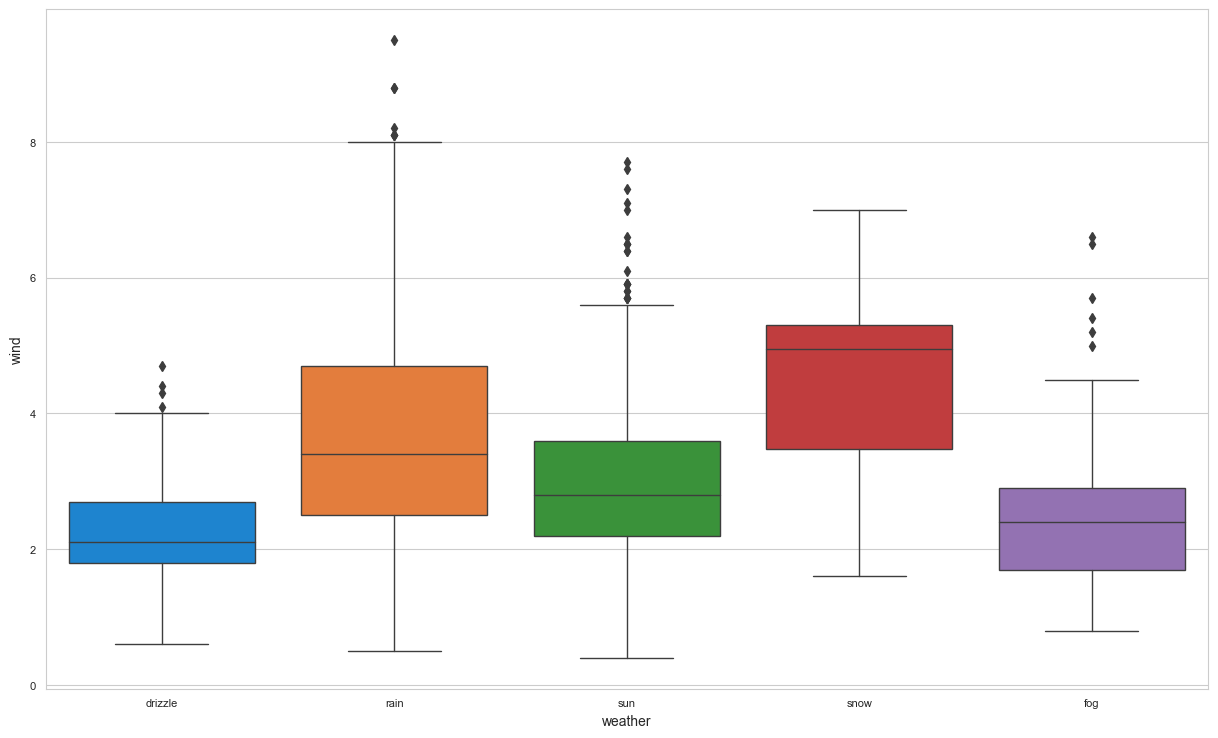

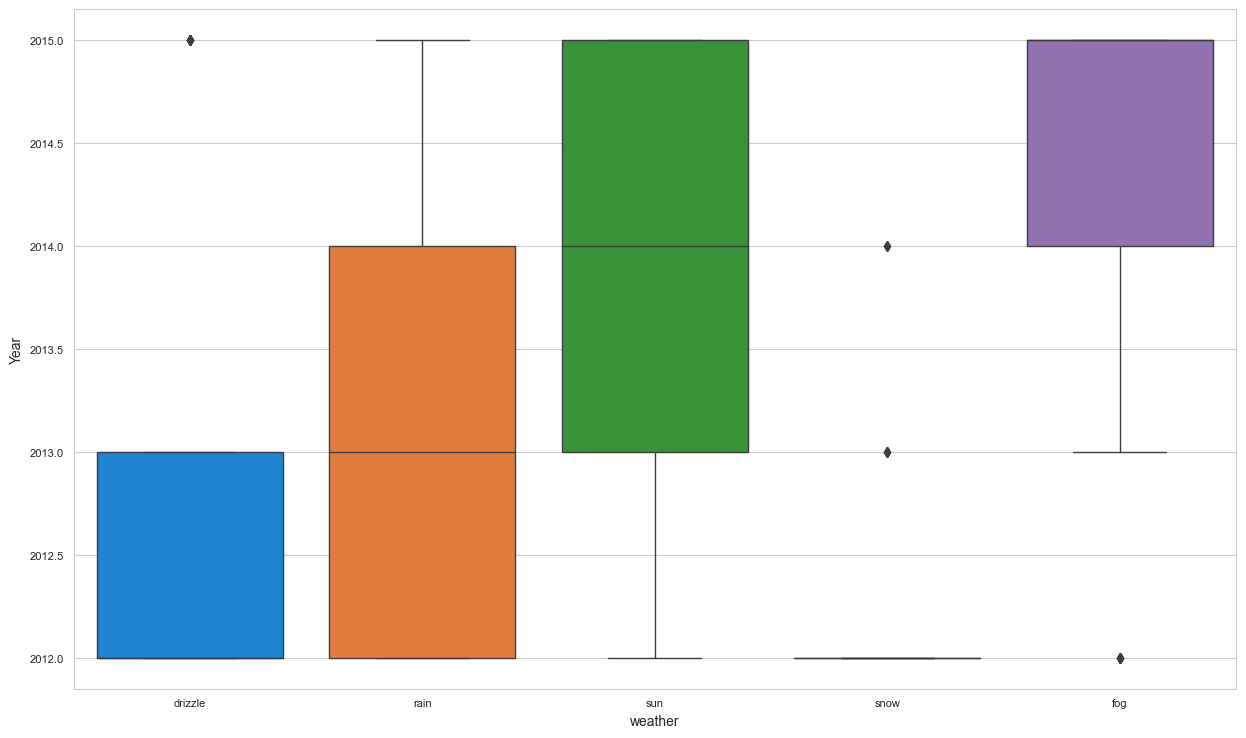

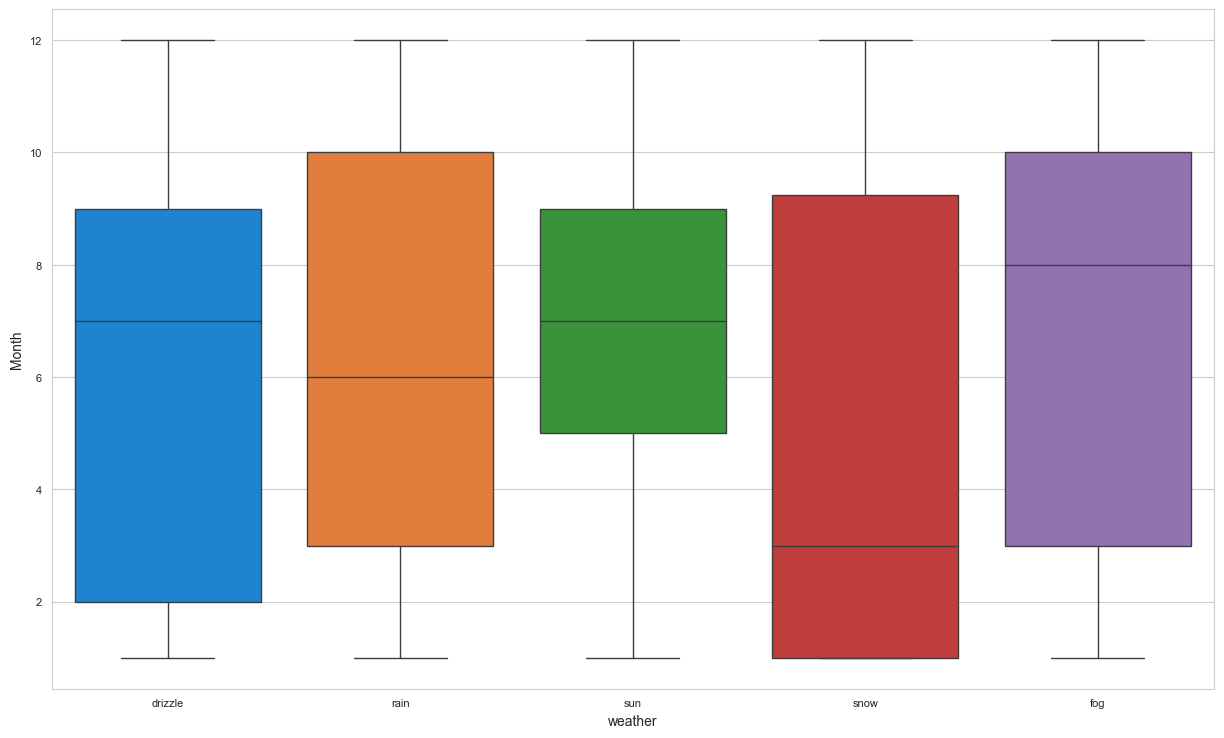

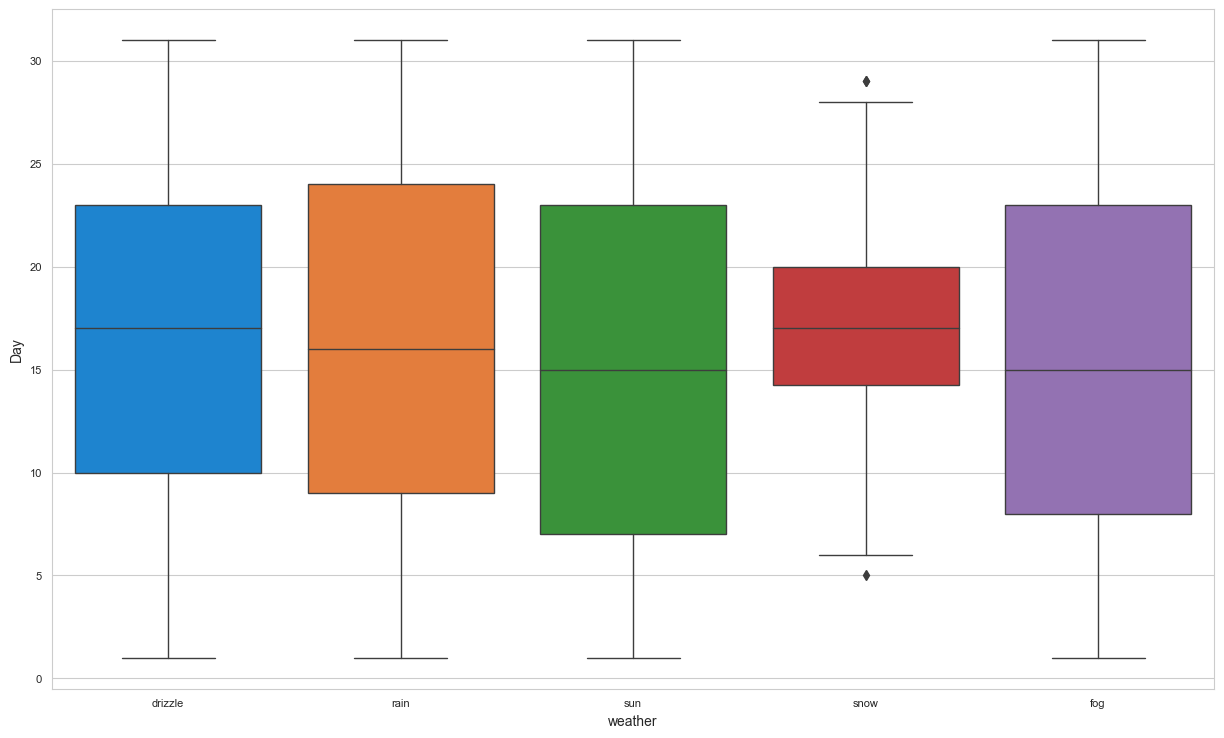

In [112]:
for i in ['precipitation', 'temp_max', 'temp_min', 'wind','Year',
       'Month', 'Day']:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=df.weather,y=df[i],data=df,linewidth=1,)
    plt.show()

In [109]:
df.head(2)

,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2


In [111]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

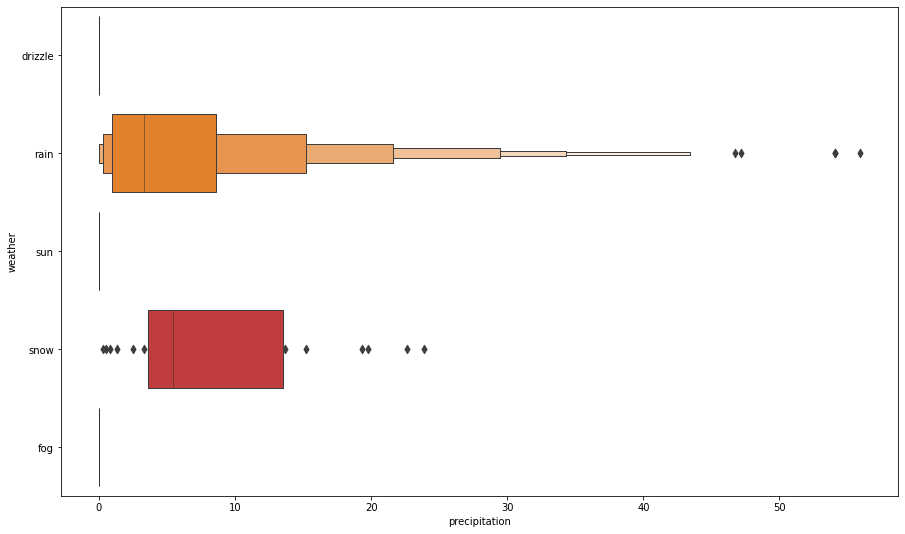

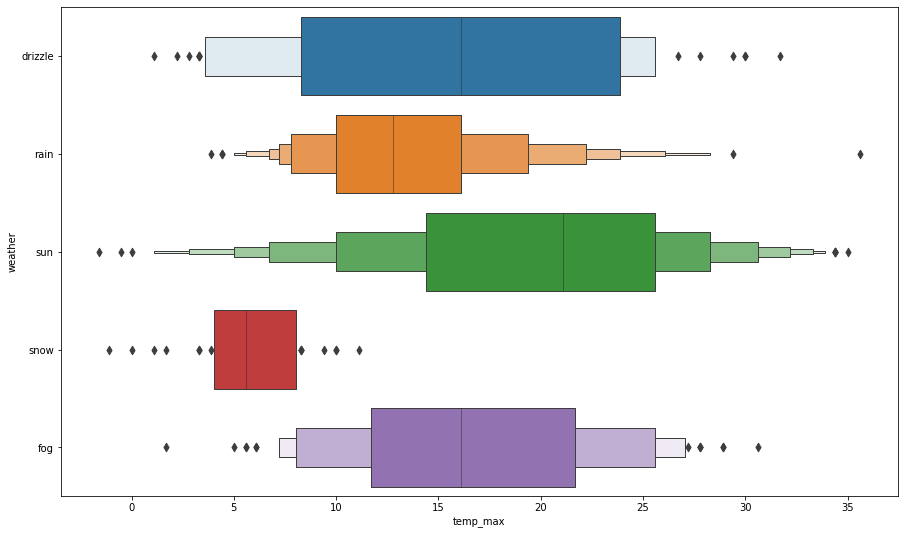

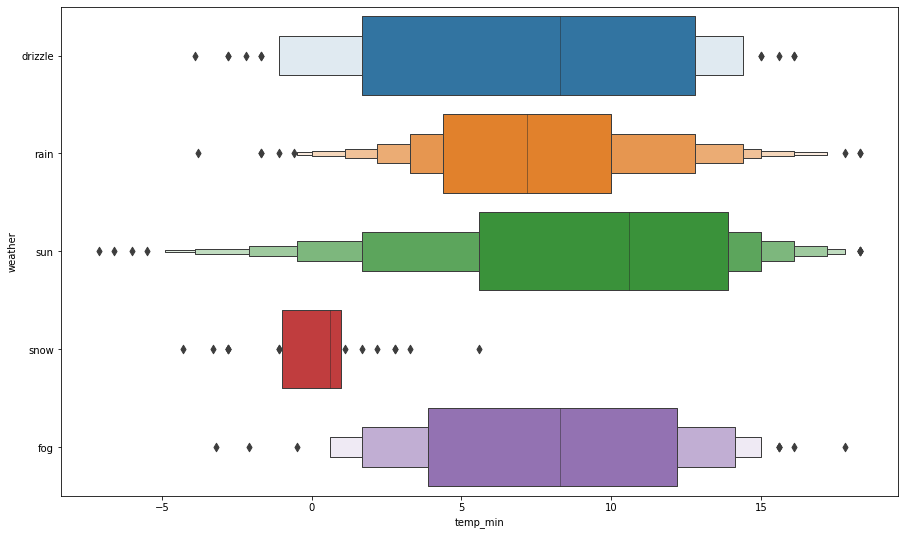

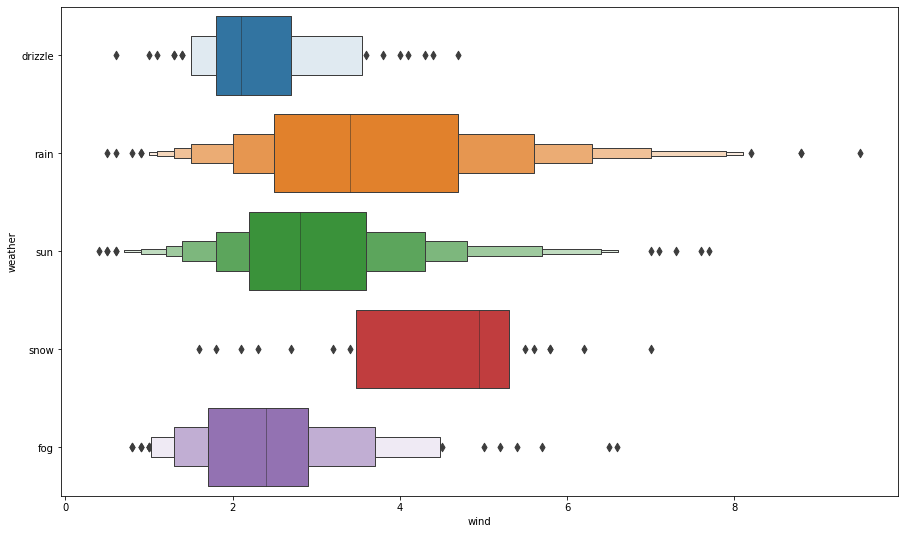

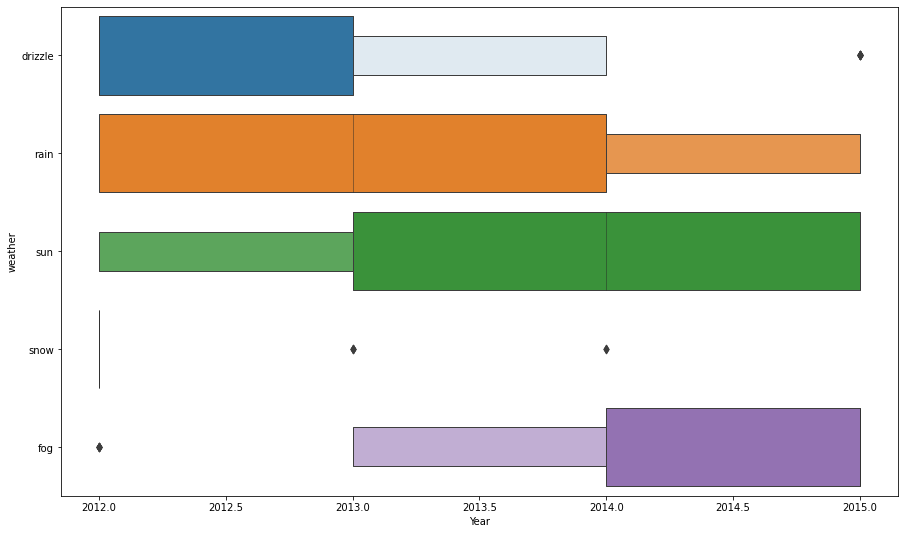

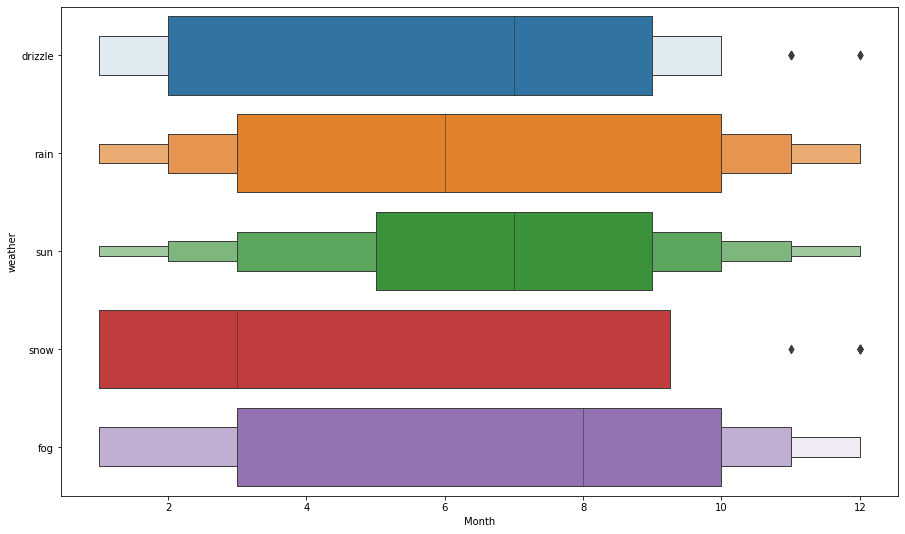

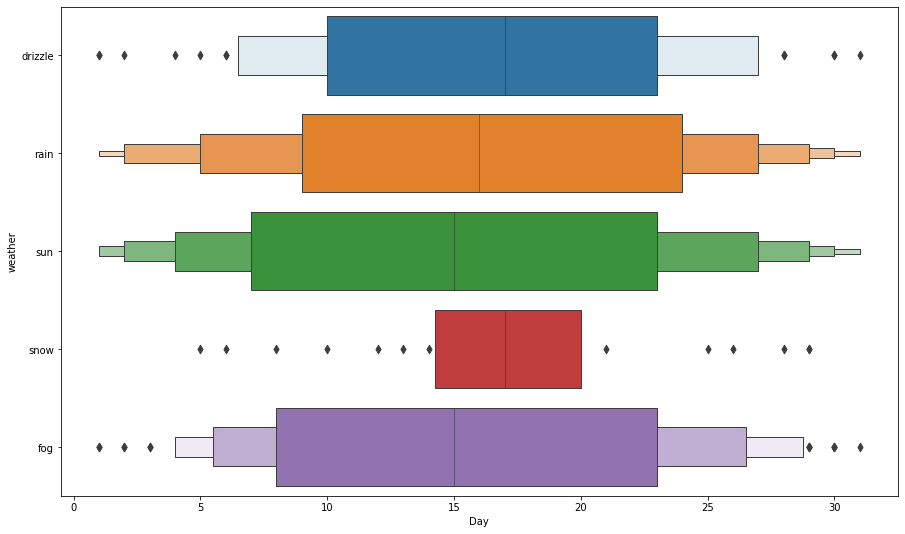

In [60]:
for i in ['precipitation', 'temp_max', 'temp_min', 'wind','Year',
       'Month', 'Day']:
    plt.figure(figsize=(15,9))
    sns.boxenplot(y=df.weather,x=df[i],data=df,linewidth=1,)
    plt.show()

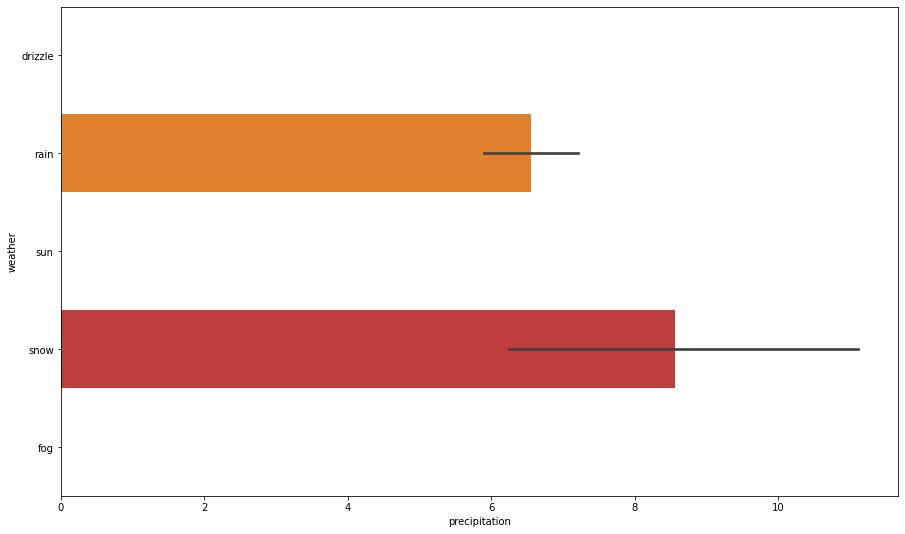

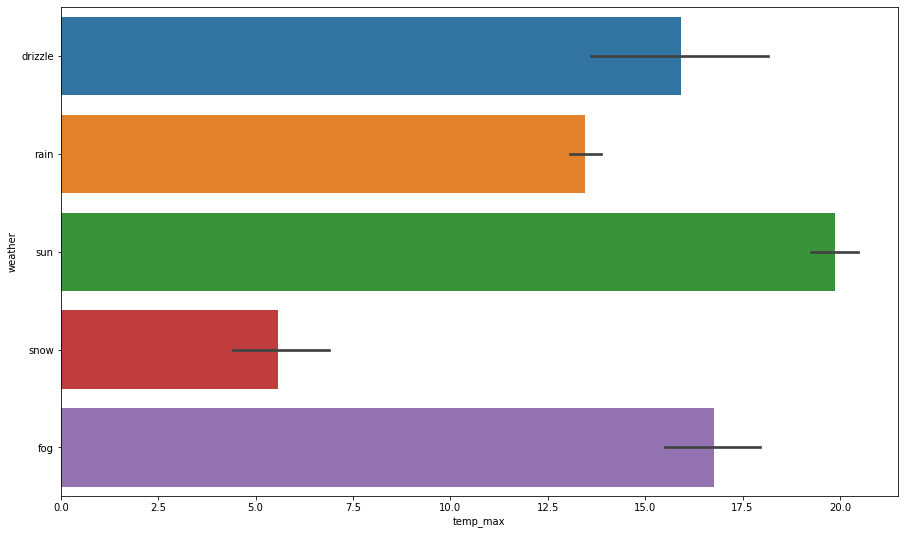

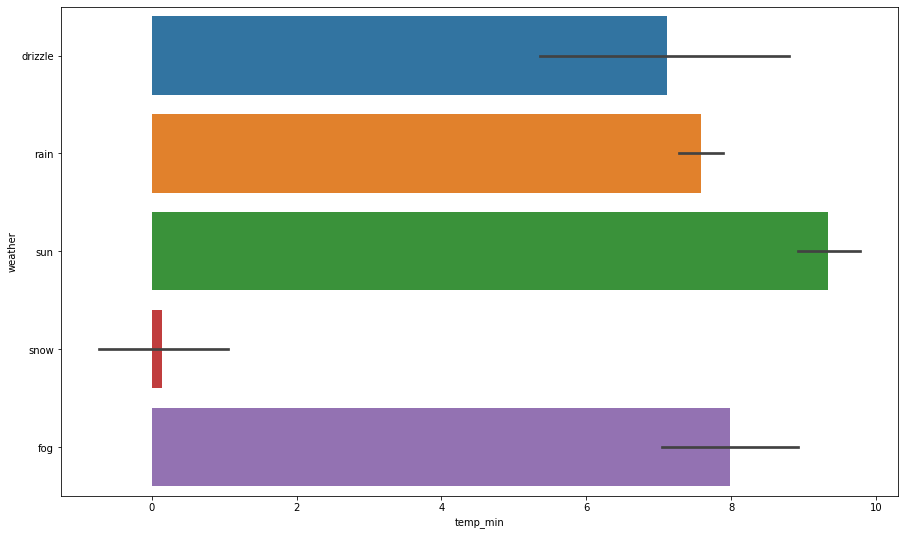

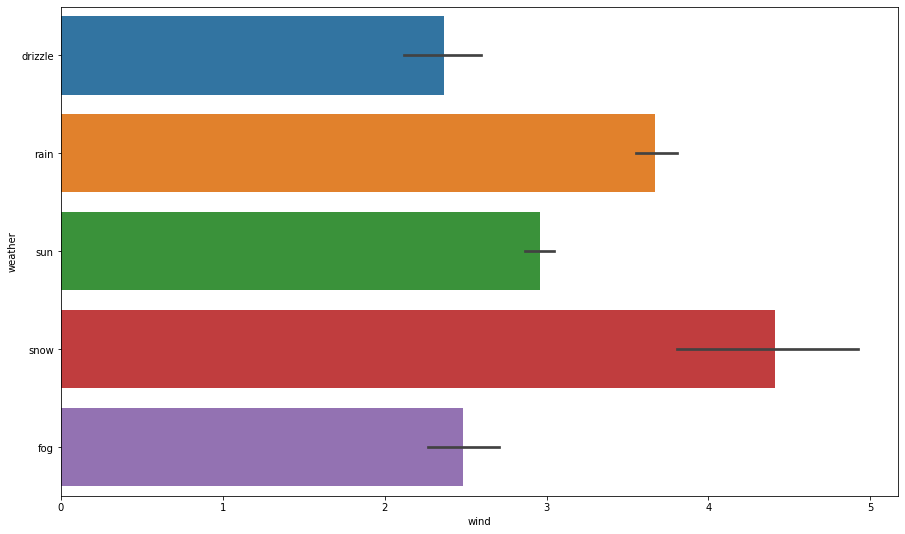

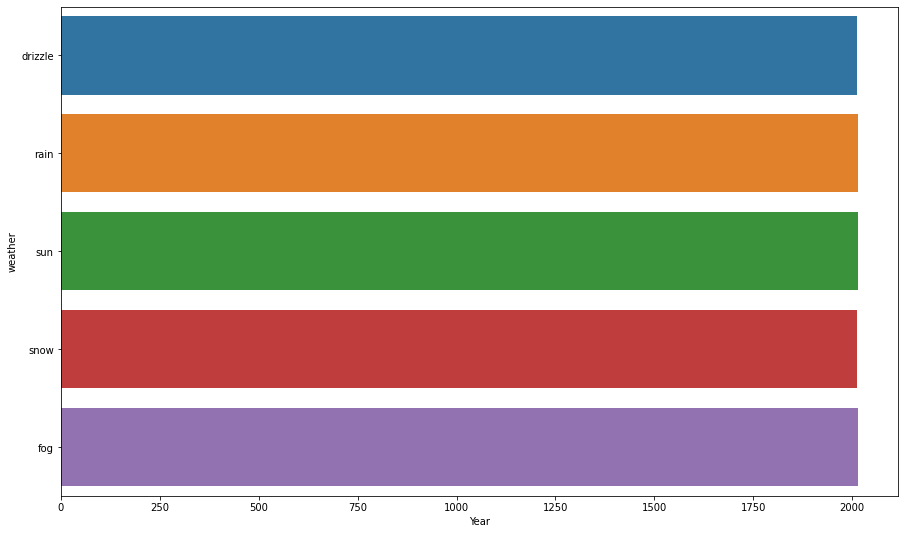

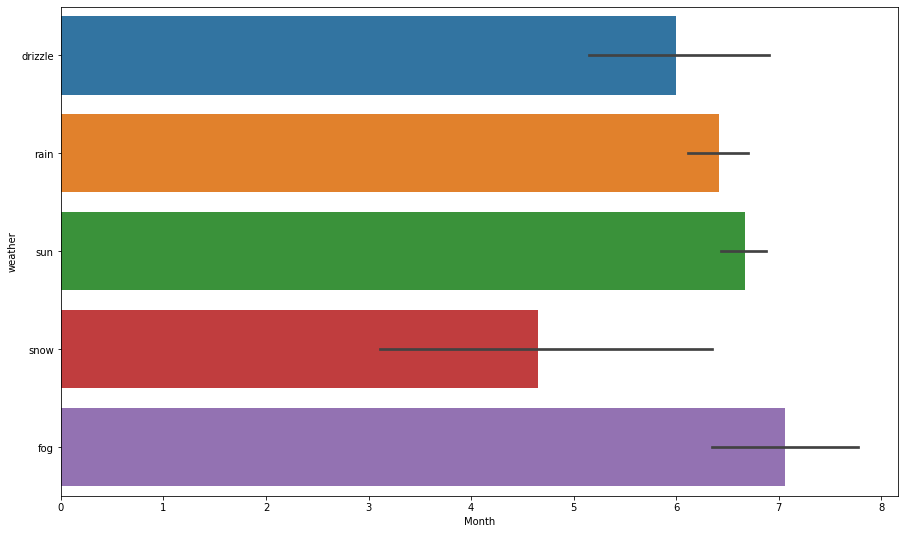

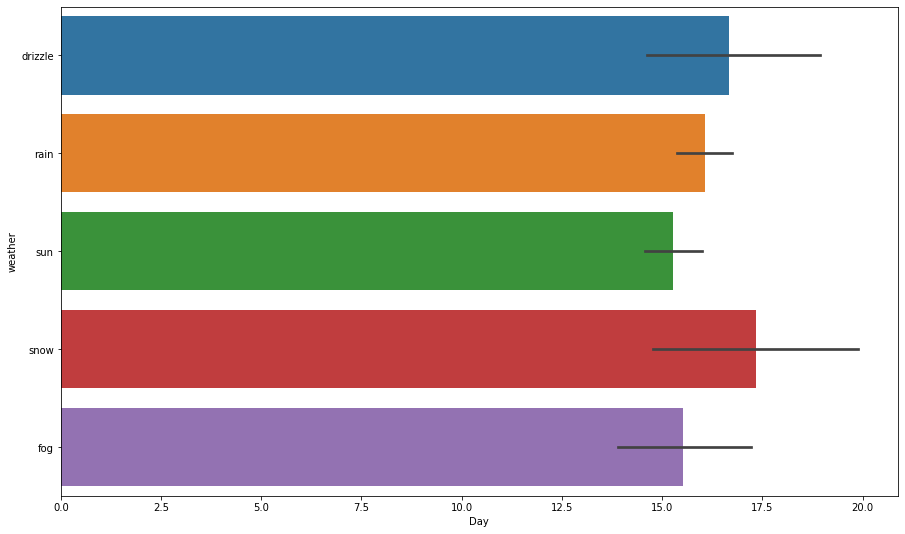

In [61]:
for i in ['precipitation', 'temp_max', 'temp_min', 'wind','Year',
       'Month', 'Day']:
    plt.figure(figsize=(15,9))
    sns.barplot(y=df.weather,x=df[i],data=df,linewidth=1,)
    plt.show()

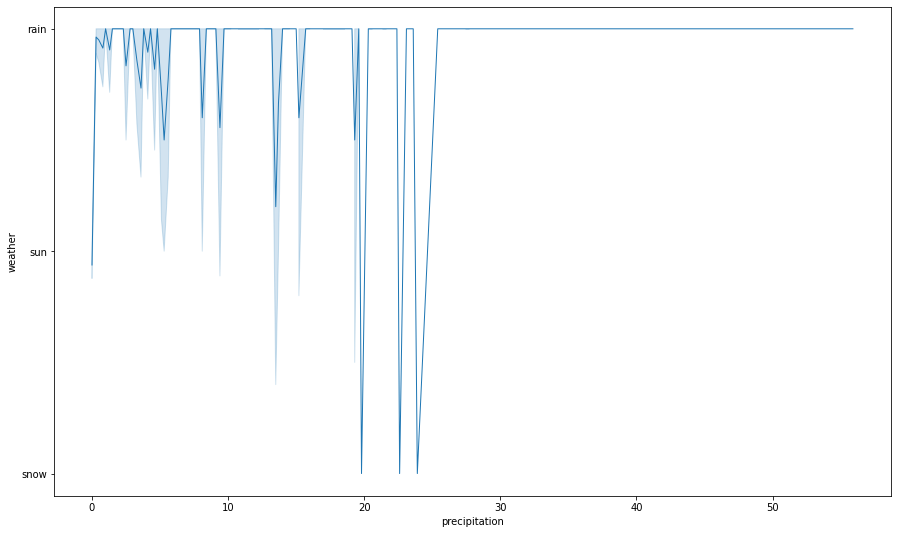

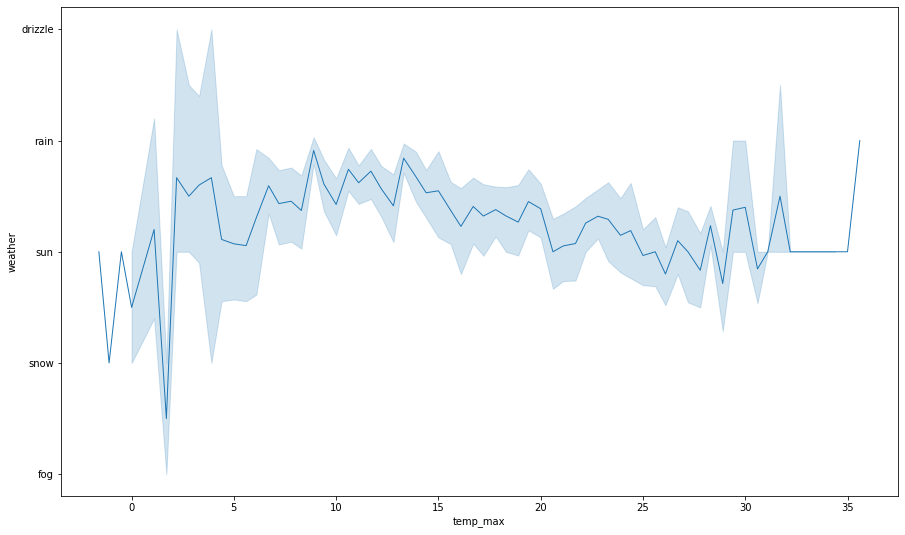

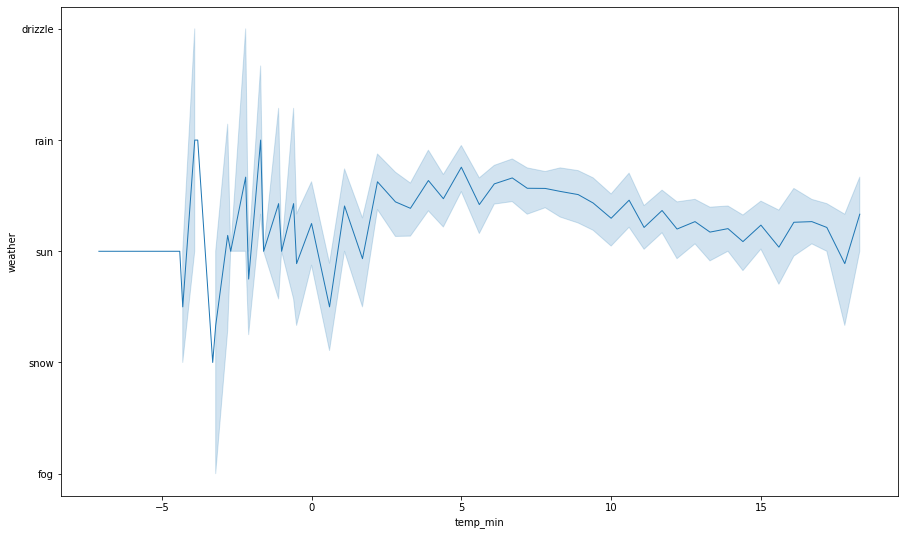

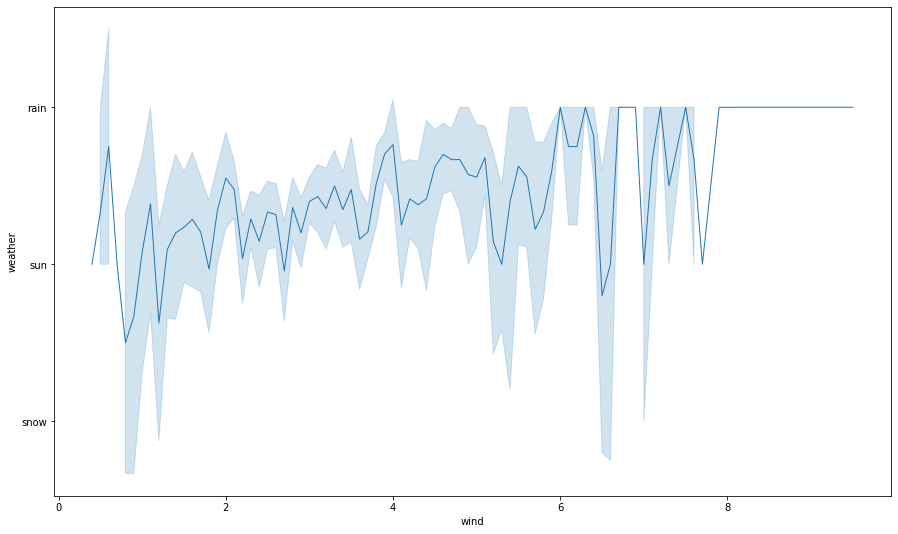

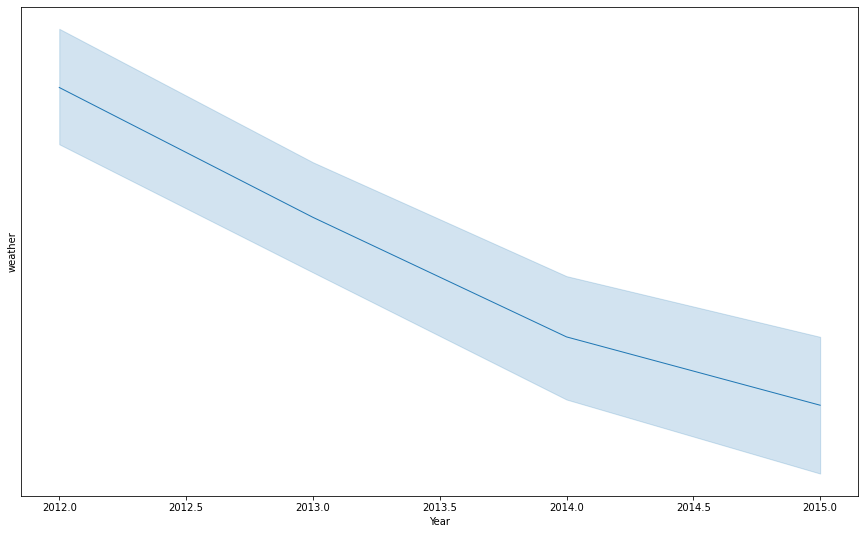

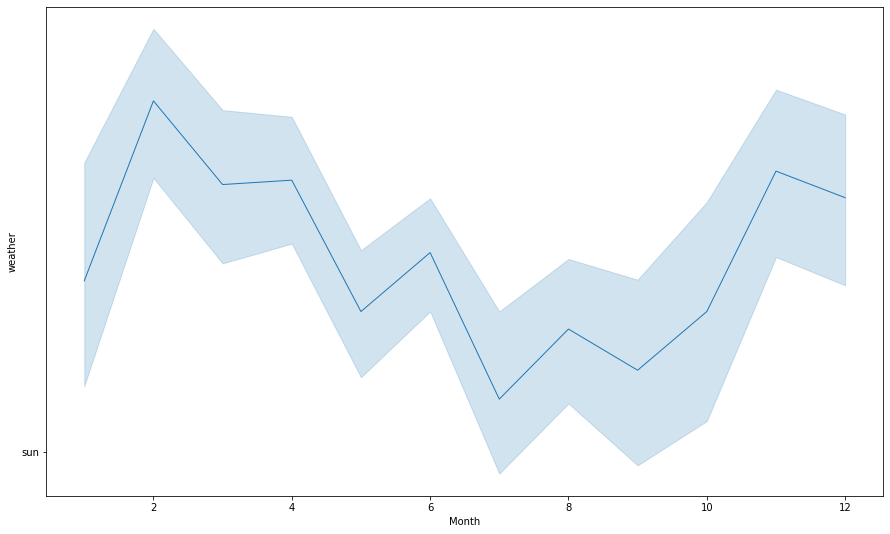

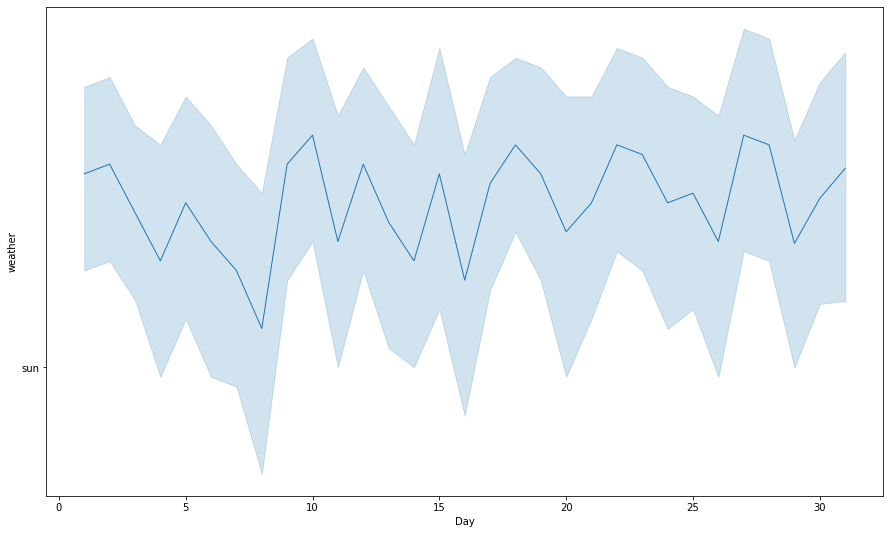

In [62]:
for i in ['precipitation', 'temp_max', 'temp_min', 'wind','Year',
       'Month', 'Day']:
    plt.figure(figsize=(15,9))
    sns.lineplot(y=df.weather,x=df[i],data=df,linewidth=1,)
    plt.show()

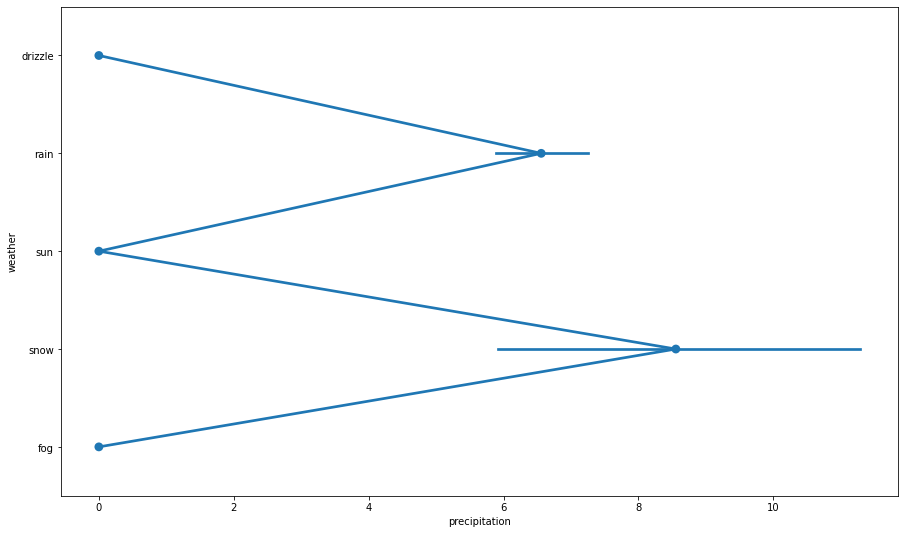

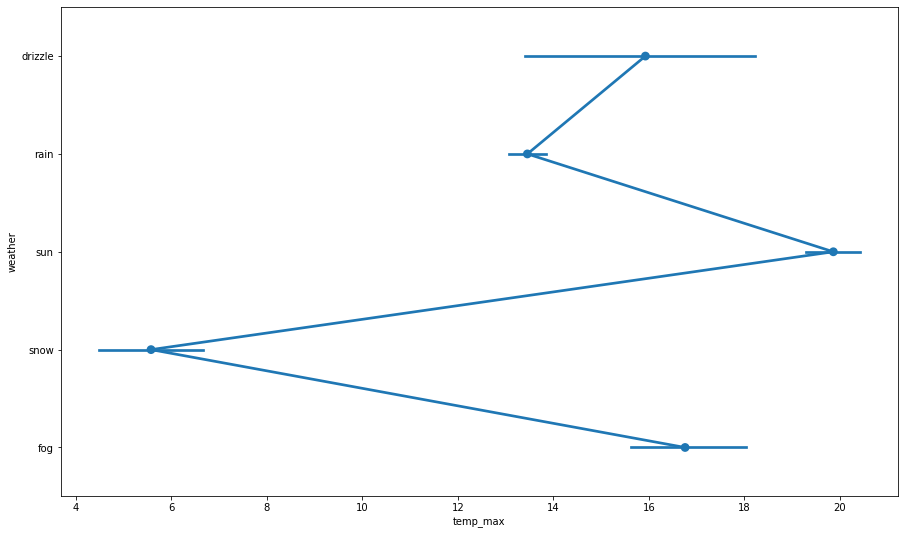

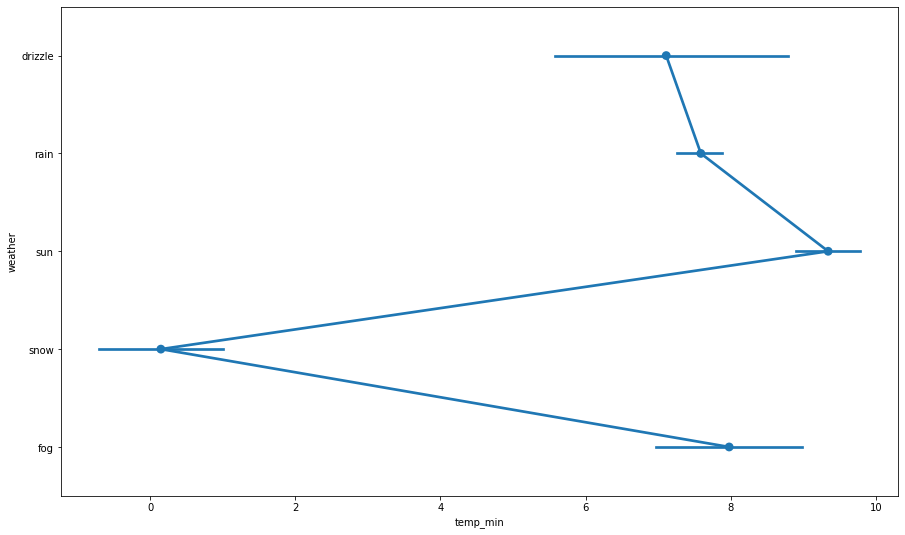

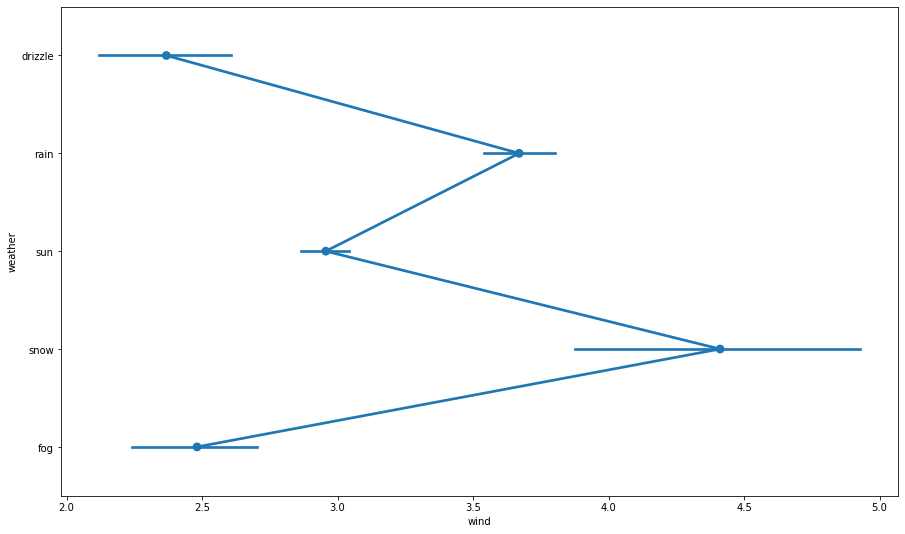

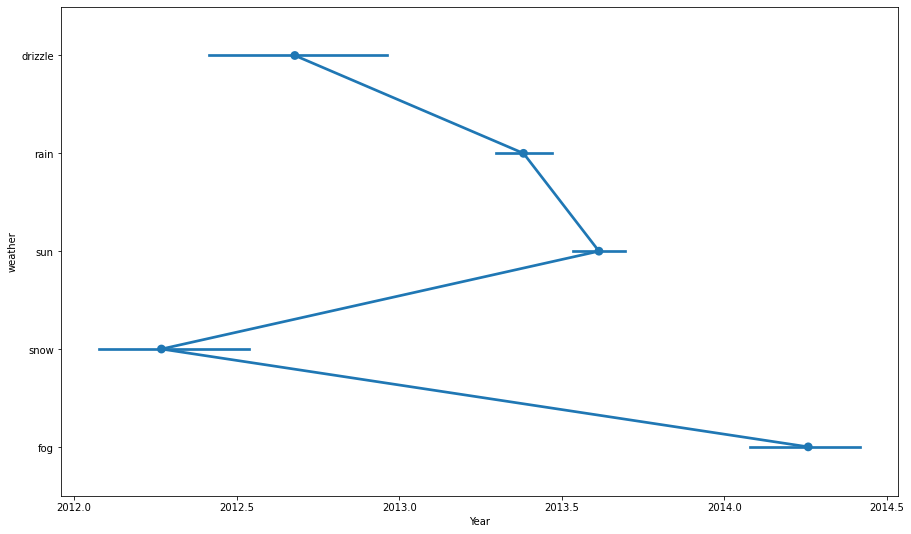

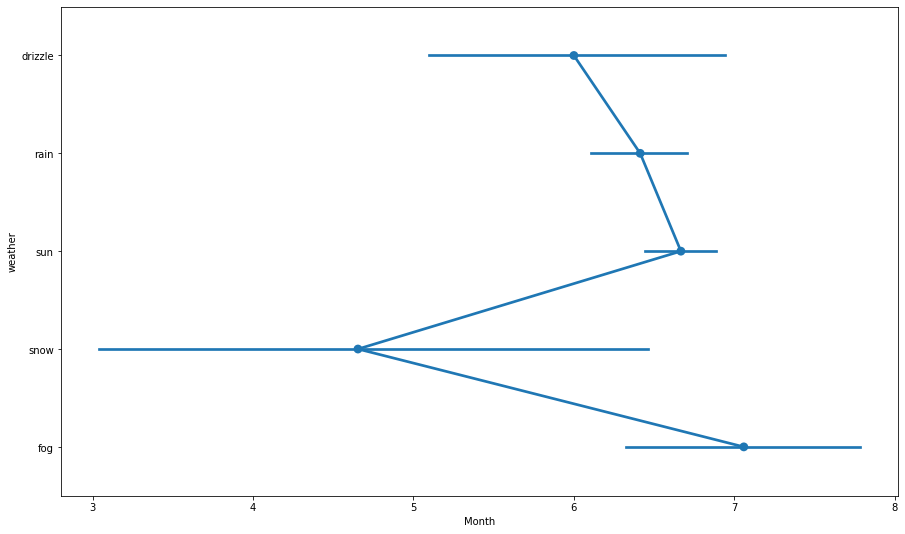

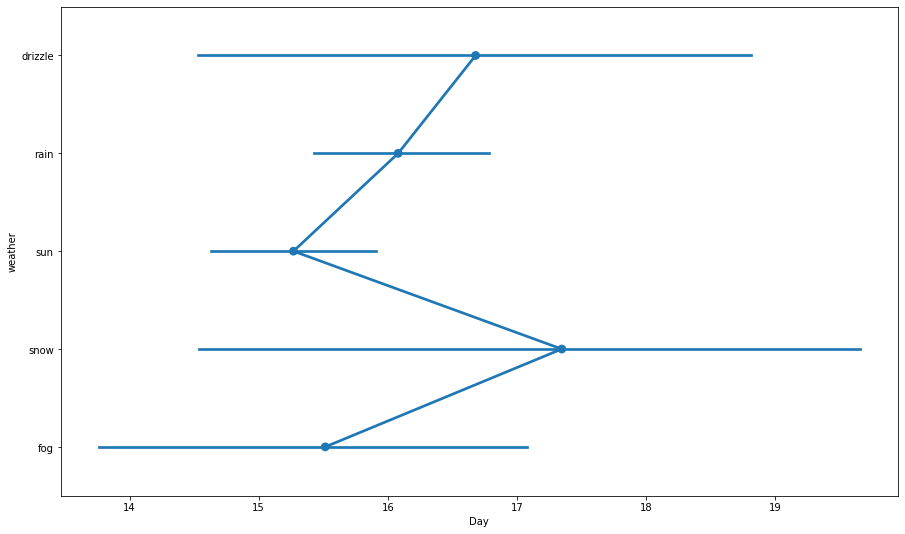

In [63]:
for i in ['precipitation', 'temp_max', 'temp_min', 'wind','Year',
       'Month', 'Day']:
    plt.figure(figsize=(15,9))
    sns.pointplot(y=df.weather,x=df[i],data=df,linewidth=1,)
    plt.show()

<Figure size 1080x648 with 0 Axes>

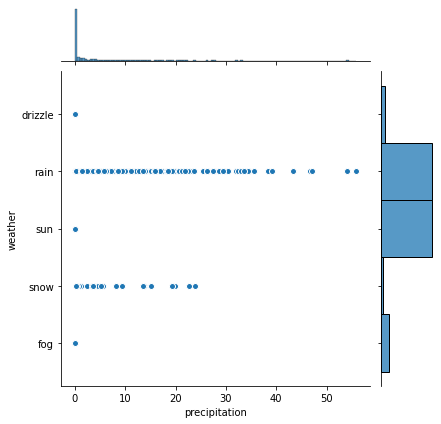

<Figure size 1080x648 with 0 Axes>

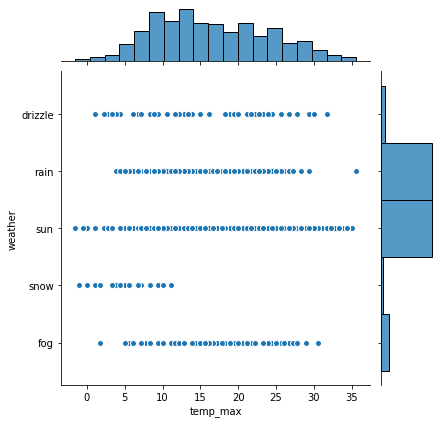

<Figure size 1080x648 with 0 Axes>

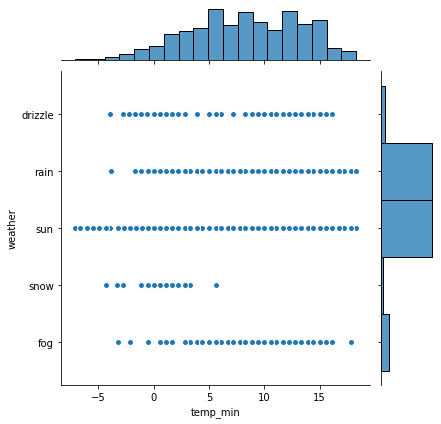

<Figure size 1080x648 with 0 Axes>

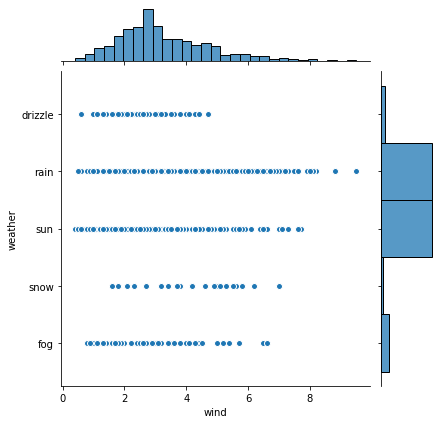

<Figure size 1080x648 with 0 Axes>

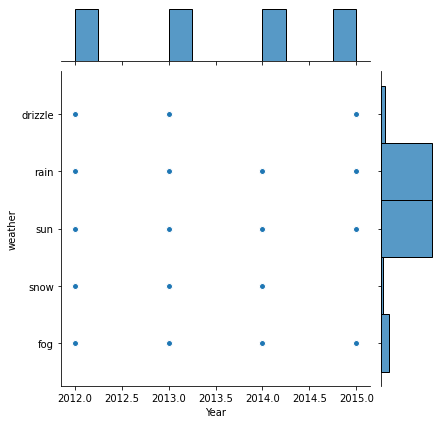

<Figure size 1080x648 with 0 Axes>

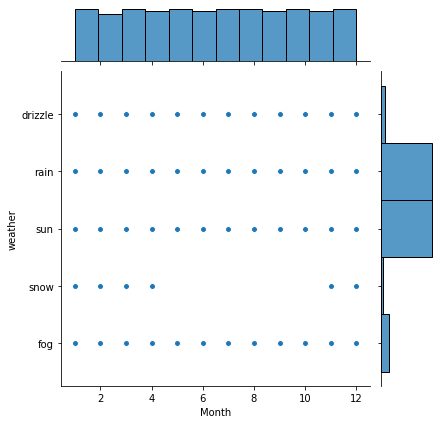

<Figure size 1080x648 with 0 Axes>

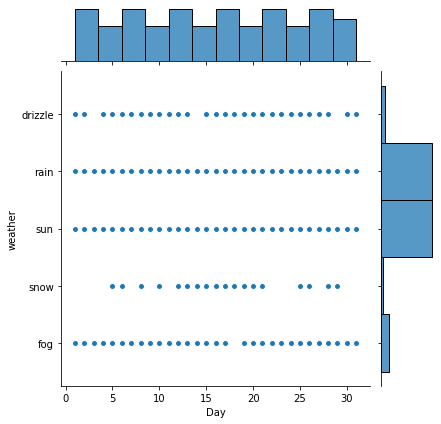

In [65]:
for i in ['precipitation', 'temp_max', 'temp_min', 'wind','Year',
       'Month', 'Day']:
    plt.figure(figsize=(15,9))
    sns.jointplot(y=df.weather,x=df[i],data=df,linewidth=1,kind='scatter')
    plt.show()

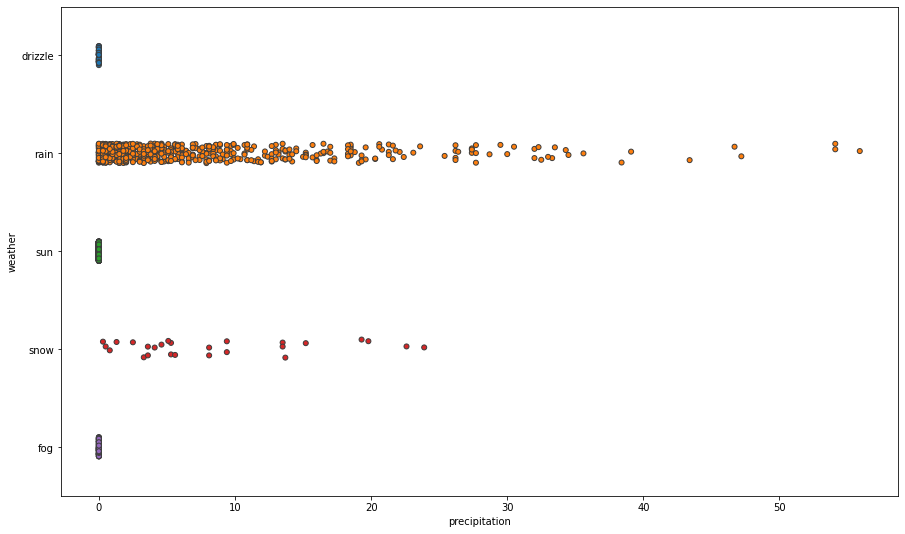

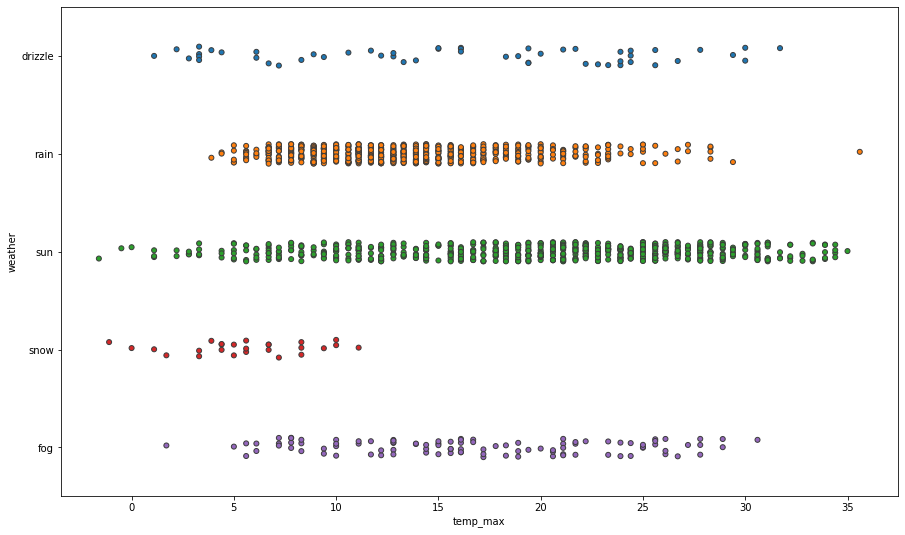

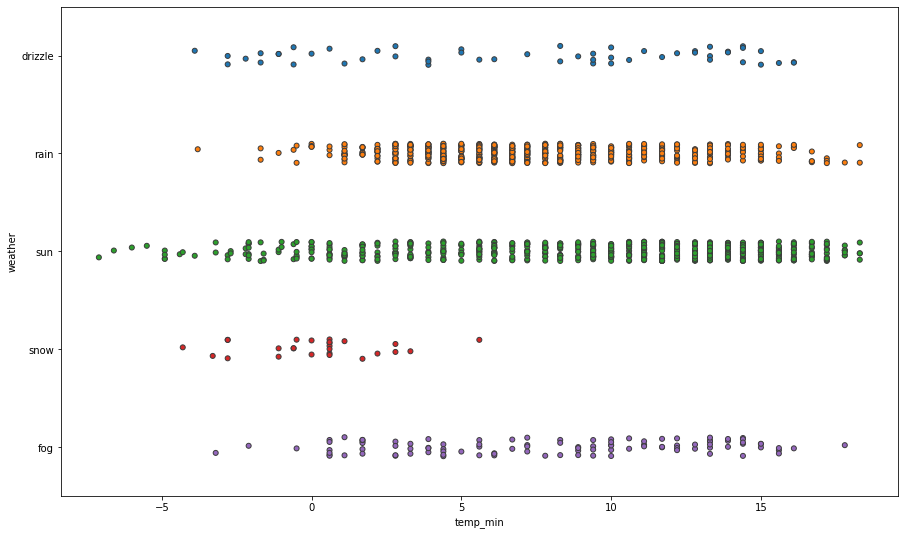

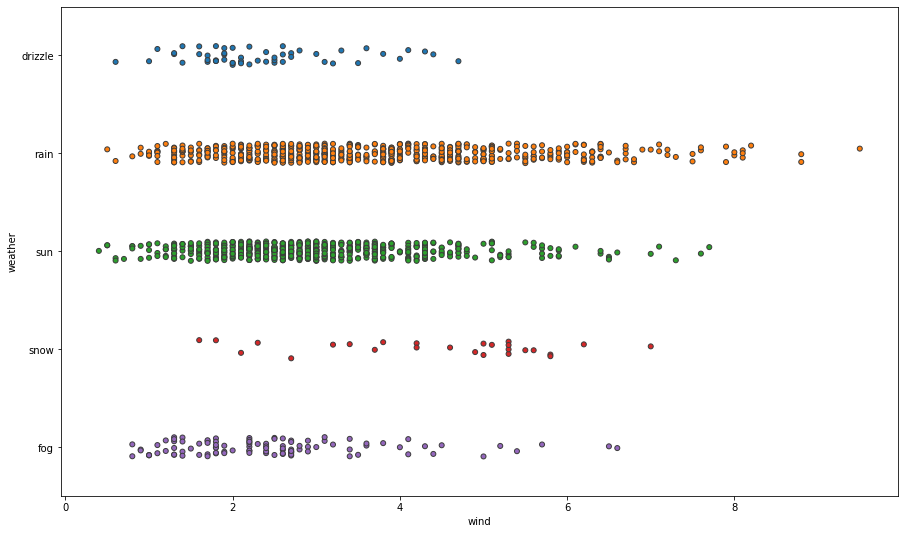

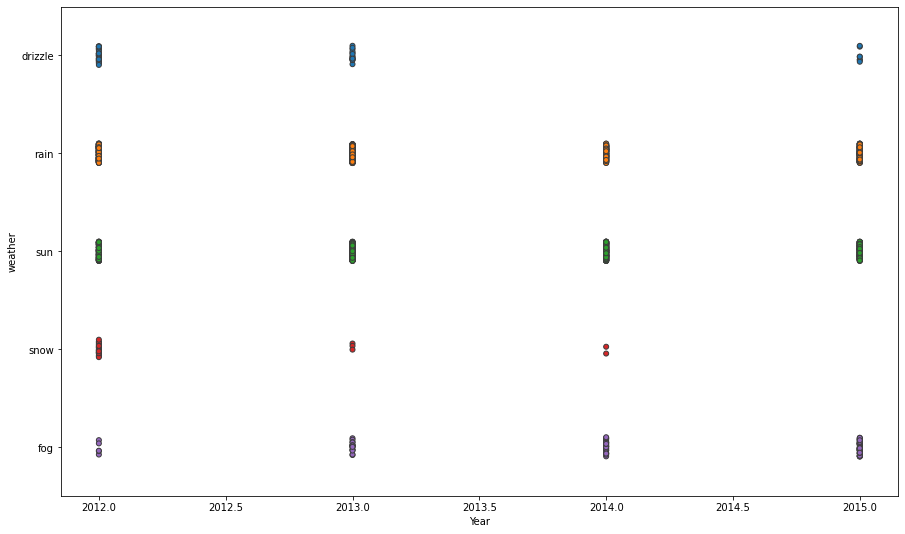

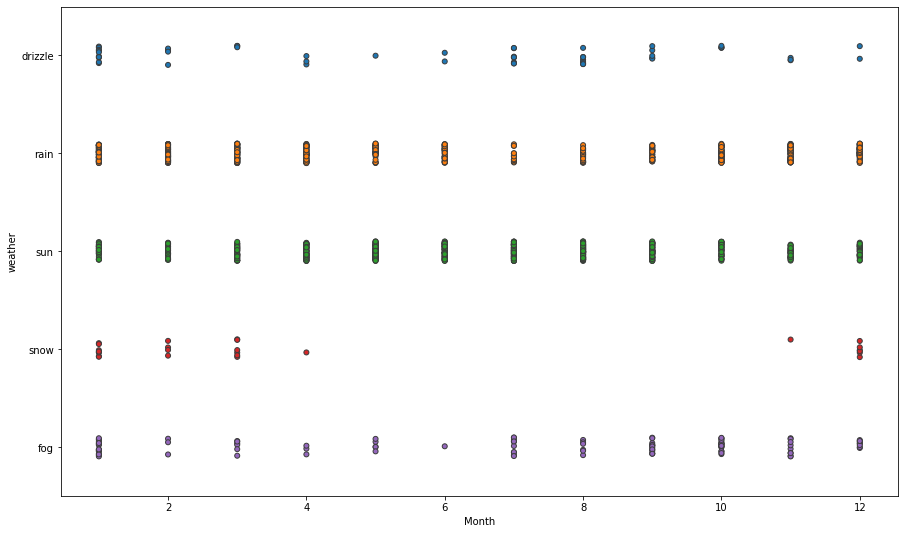

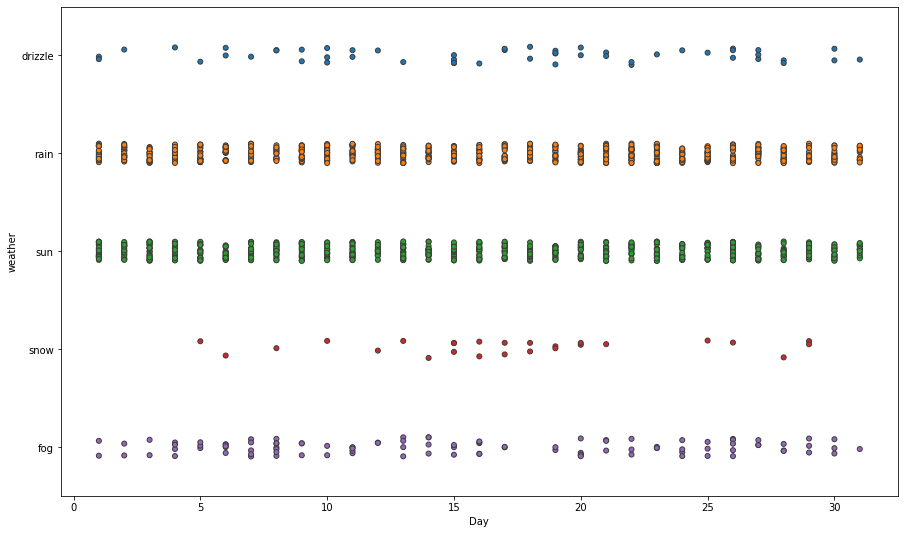

In [66]:
for i in ['precipitation', 'temp_max', 'temp_min', 'wind','Year',
       'Month', 'Day']:
    plt.figure(figsize=(15,9))
    sns.stripplot(y=df.weather,x=df[i],data=df,linewidth=1,)
    plt.show()

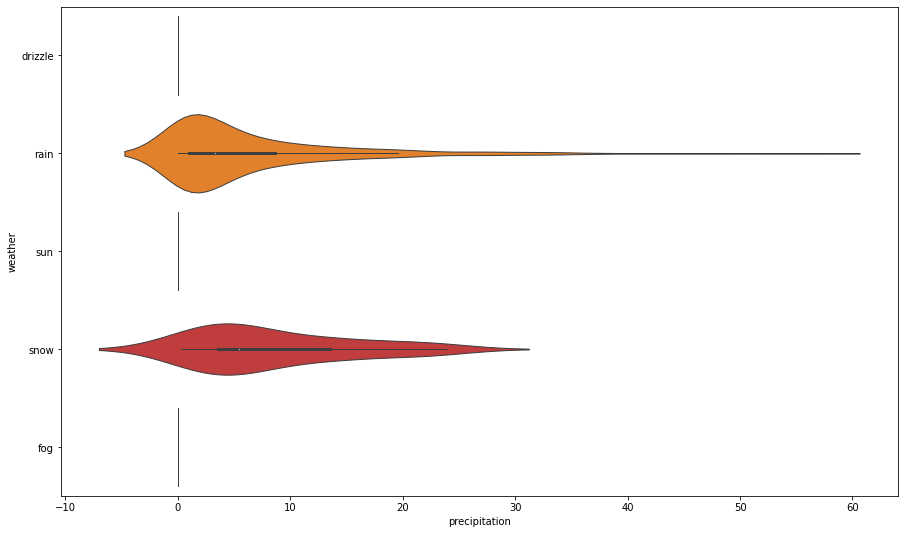

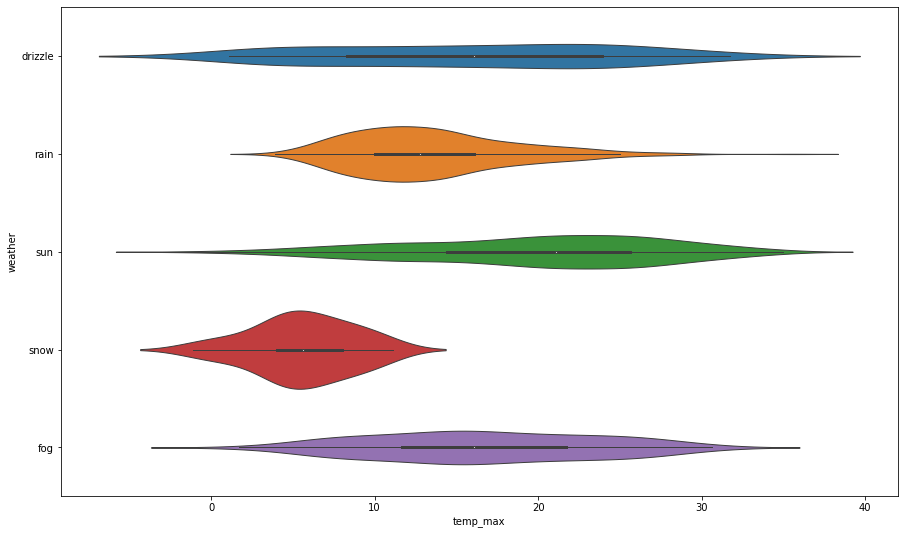

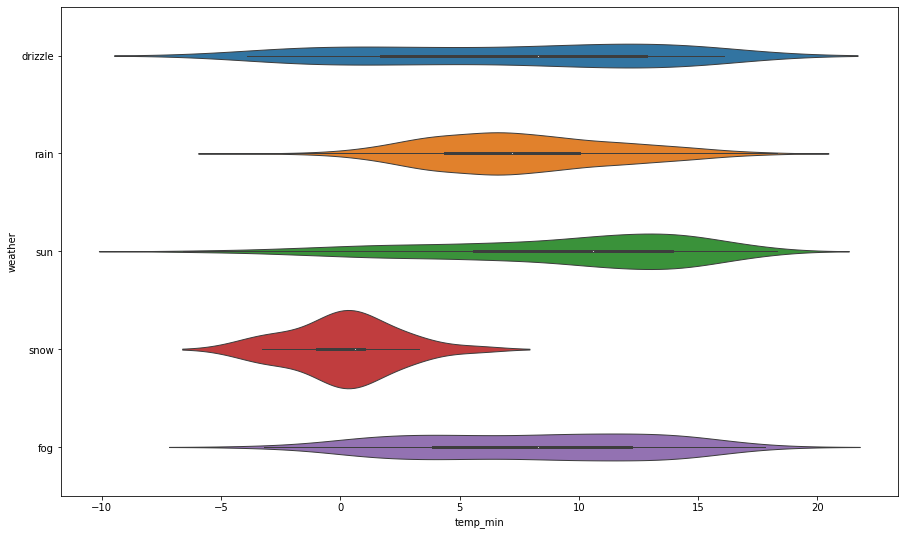

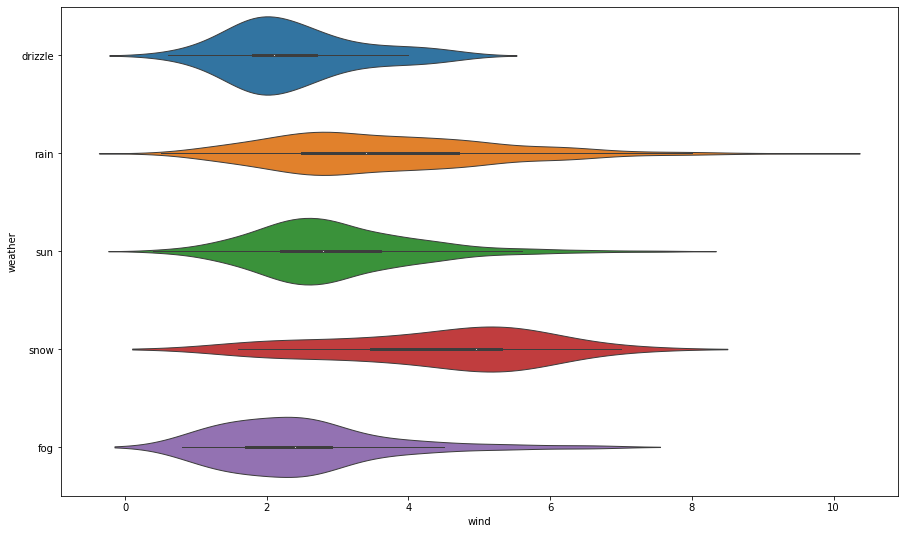

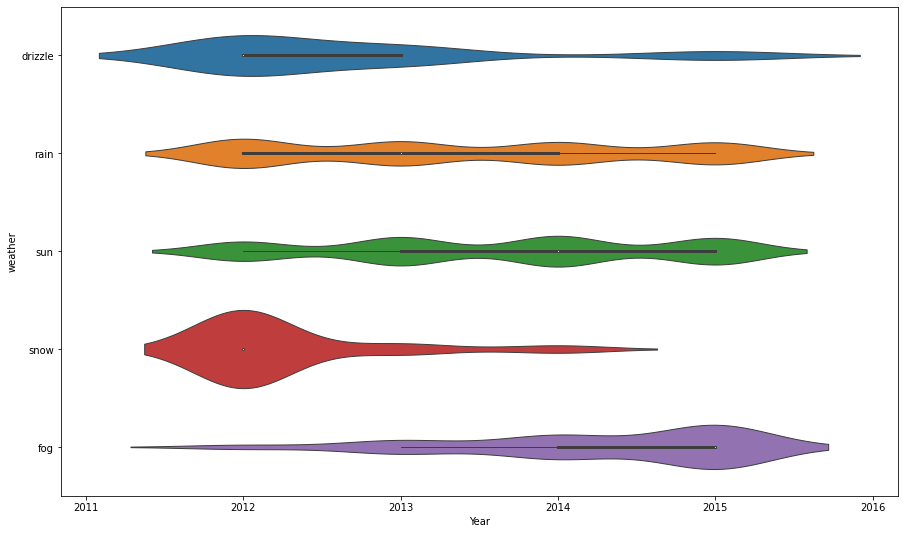

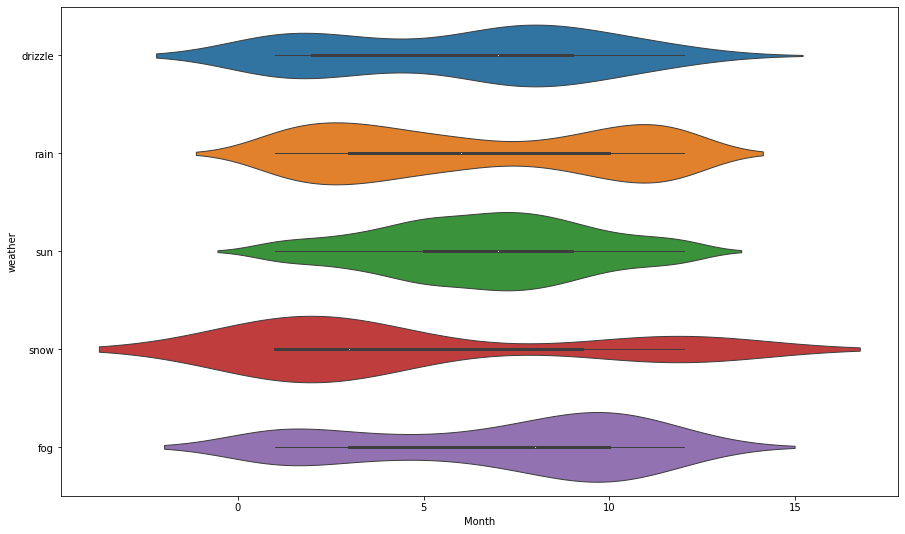

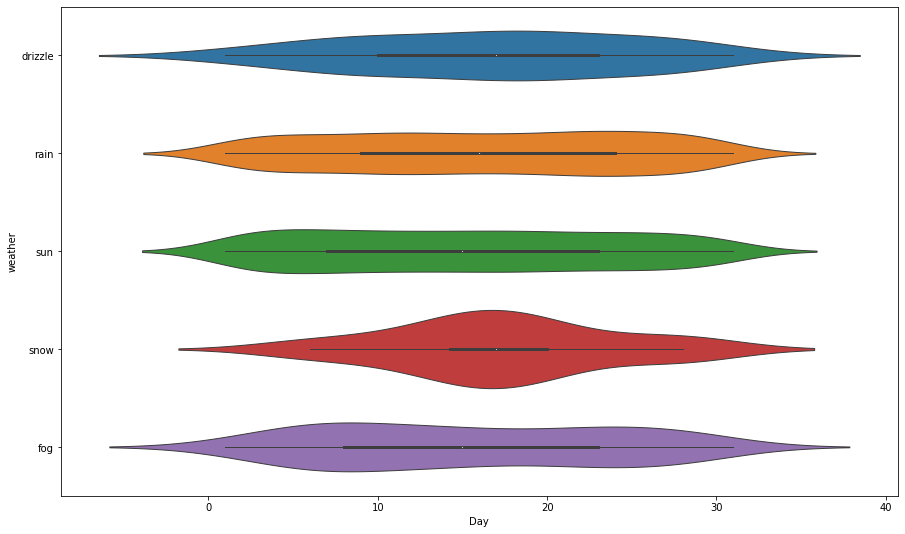

In [67]:
for i in ['precipitation', 'temp_max', 'temp_min', 'wind','Year',
       'Month', 'Day']:
    plt.figure(figsize=(15,9))
    sns.violinplot(y=df.weather,x=df[i],data=df,linewidth=1,)
    plt.show()

array([[<AxesSubplot:title={'center':'precipitation'}>,
        <AxesSubplot:title={'center':'temp_max'}>,
        <AxesSubplot:title={'center':'temp_min'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

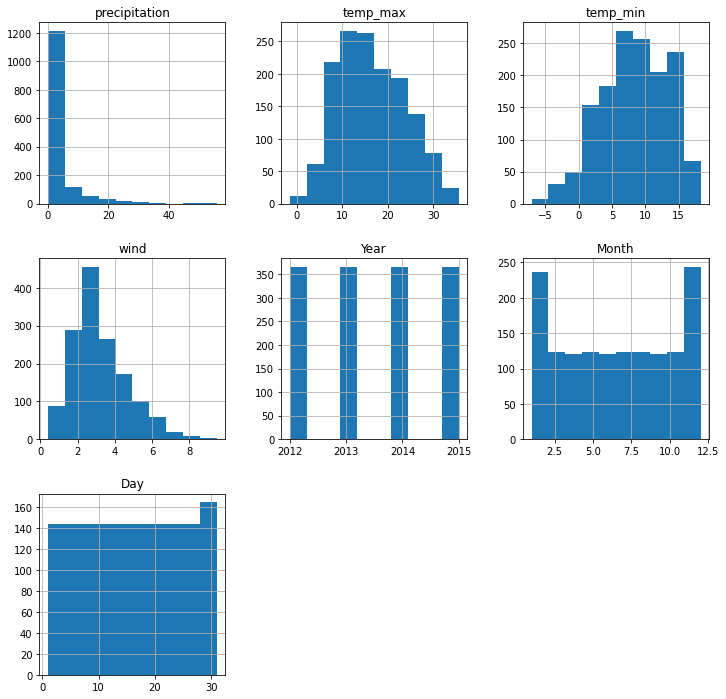

In [68]:
df.hist(figsize=(12,12))

In [69]:
import sweetviz as sv
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [70]:
from IPython.display import IFrame

In [71]:
IFrame(src='Analyze.html',width=1000,height=600)

In [72]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3
3,20.3,12.2,5.6,4.7,rain,2012,1,4
4,1.3,8.9,2.8,6.1,rain,2012,1,5


In [73]:
x=df.drop(['weather'],axis='columns')
y=df.weather.values

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [77]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

77.22095671981776

In [78]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

     drizzle       0.12      0.21      0.16        14
         fog       0.33      0.38      0.35        32
        rain       0.92      0.90      0.91       192
        snow       0.33      0.38      0.35         8
         sun       0.81      0.77      0.79       193

    accuracy                           0.77       439
   macro avg       0.51      0.53      0.51       439
weighted avg       0.79      0.77      0.78       439



In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest , pred_tre)*100
accu_kne

77.22095671981776

In [81]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

     drizzle       0.20      0.07      0.11        14
         fog       0.31      0.12      0.18        32
        rain       0.78      0.80      0.79       192
        snow       1.00      0.12      0.22         8
         sun       0.71      0.82      0.76       193

    accuracy                           0.72       439
   macro avg       0.60      0.39      0.41       439
weighted avg       0.70      0.72      0.70       439



In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest , pred_ada)*100
accu_ada

62.1867881548975

In [84]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

     drizzle       0.40      0.14      0.21        14
         fog       0.11      0.47      0.18        32
        rain       0.94      0.92      0.93       192
        snow       0.00      0.00      0.00         8
         sun       0.70      0.41      0.52       193

    accuracy                           0.62       439
   macro avg       0.43      0.39      0.37       439
weighted avg       0.74      0.62      0.65       439



In [85]:
from sklearn.ensemble import BaggingClassifier

In [86]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

83.37129840546697

In [87]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

     drizzle       0.33      0.29      0.31        14
         fog       0.50      0.28      0.36        32
        rain       0.93      0.93      0.93       192
        snow       0.40      0.25      0.31         8
         sun       0.81      0.90      0.85       193

    accuracy                           0.83       439
   macro avg       0.60      0.53      0.55       439
weighted avg       0.82      0.83      0.82       439



In [88]:
from sklearn.svm import SVC

In [89]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_siv=svc.predict(xtest)
accu_l=accuracy_score(ytest,pre_siv)*100
accu_l

43.735763097949885

In [90]:
print(classification_report(ytest,pre_siv))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        14
         fog       0.00      0.00      0.00        32
        rain       0.44      1.00      0.61       192
        snow       0.00      0.00      0.00         8
         sun       0.00      0.00      0.00       193

    accuracy                           0.44       439
   macro avg       0.09      0.20      0.12       439
weighted avg       0.19      0.44      0.27       439



In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

84.73804100227791

In [93]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

     drizzle       0.33      0.21      0.26        14
         fog       1.00      0.16      0.27        32
        rain       0.99      0.89      0.94       192
        snow       0.50      0.88      0.64         8
         sun       0.78      0.97      0.86       193

    accuracy                           0.85       439
   macro avg       0.72      0.62      0.59       439
weighted avg       0.87      0.85      0.83       439



In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
ada=AdaBoostClassifier()
#rdf=RandomForestClassifier()
ada.fit(xtrain,ytrain)
pre_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pre_ada)*100
accu_ada

62.1867881548975

In [96]:
print(classification_report(ytest,pre_ada))

              precision    recall  f1-score   support

     drizzle       0.40      0.14      0.21        14
         fog       0.11      0.47      0.18        32
        rain       0.94      0.92      0.93       192
        snow       0.00      0.00      0.00         8
         sun       0.70      0.41      0.52       193

    accuracy                           0.62       439
   macro avg       0.43      0.39      0.37       439
weighted avg       0.74      0.62      0.65       439



In [97]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
grd=GradientBoostingClassifier()
grd.fit(xtrain,ytrain)
pre_grd=grd.predict(xtest)
accu_grd=accuracy_score(ytest,pre_ada)*100
accu_grd

62.1867881548975

In [99]:
print(classification_report(ytest,pre_grd))

              precision    recall  f1-score   support

     drizzle       0.25      0.07      0.11        14
         fog       0.57      0.25      0.35        32
        rain       0.95      0.91      0.93       192
        snow       0.33      0.25      0.29         8
         sun       0.78      0.94      0.86       193

    accuracy                           0.84       439
   macro avg       0.58      0.48      0.51       439
weighted avg       0.82      0.84      0.82       439



In [100]:
from sklearn.ensemble import ExtraTreesClassifier

In [101]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

82.91571753986332

In [102]:
print(classification_report(ytest,pre_grd))

              precision    recall  f1-score   support

     drizzle       0.25      0.07      0.11        14
         fog       0.57      0.25      0.35        32
        rain       0.95      0.91      0.93       192
        snow       0.33      0.25      0.29         8
         sun       0.78      0.94      0.86       193

    accuracy                           0.84       439
   macro avg       0.58      0.48      0.51       439
weighted avg       0.82      0.84      0.82       439



In [104]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','RandomForestClassifier',  'KNeighborsClassifier',
             'AdaBoostClassifier','BaggingClassifier','SVC','GaussianNB','GradientBoostingClassifier','ExtraTreesClassifier'],
    'Score': [ accu_tre,accu_l, accu_kne, accu_ada,accu_bag,accu_l,accu_l,accu_grd,accu_etc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,RandomForestClassifier,84.738041
5,SVC,84.738041
6,GaussianNB,84.738041
4,BaggingClassifier,83.371298
8,ExtraTreesClassifier,82.915718
0,DecisionTreeClassifier,77.220957
2,KNeighborsClassifier,77.220957
3,AdaBoostClassifier,62.186788
7,GradientBoostingClassifier,62.186788


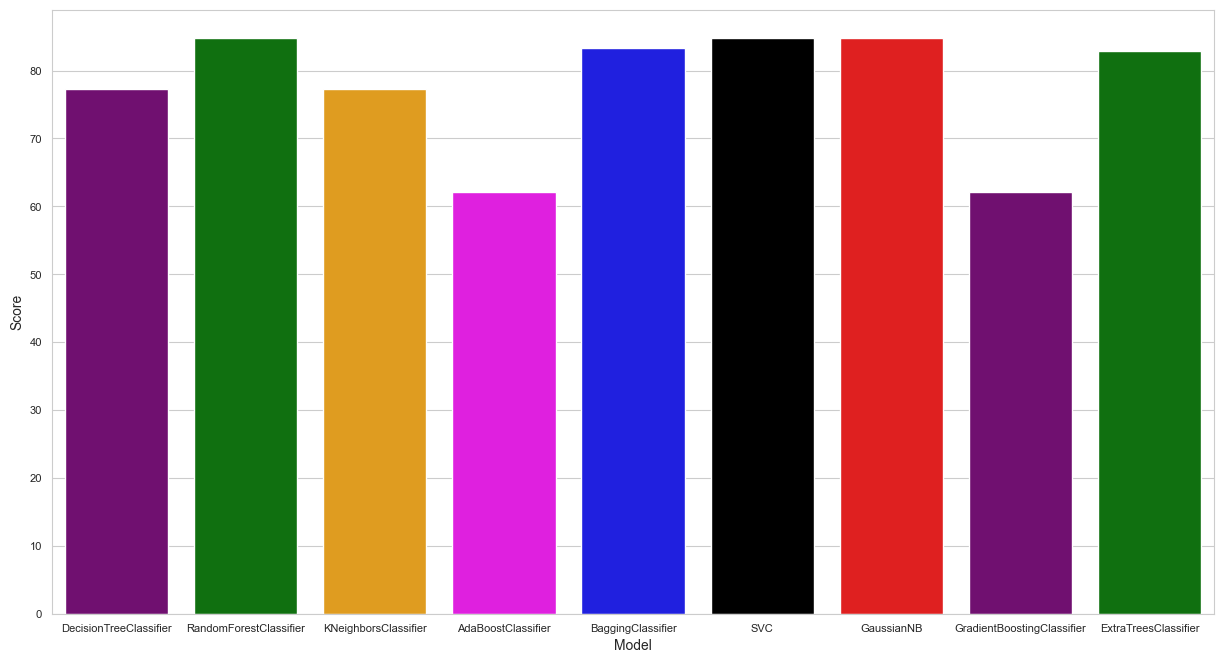

Exception occurred while processing request: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 114, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 2423, in get_data
    curr_dtypes = [c["name"] for c in global_state.get_dtypes(data_id)]
TypeError: 'NoneType' object is not iterable


2022-03-02 08:30:35,668 - ERROR    - Exception occurred while processing request: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 114, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 2423, in get_data
    curr_dtypes = [c["name"] for c in global_state.get_dtypes(data_id)]
TypeError: 'NoneType' object is not iterable


In [107]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()